## Business Case: Base on the given features we need to predict the lead category of customer [High Potential, Low Potential]

 ### It is a classification task.

## Project Introduction

> FicZon Inc is an IT solution provider with products ranging from onpremises products to SAAS based solutions. 

> FicZon major leads generation channel is digital and through their website.

> FicZon business is majorly dependent on the sales force effectiveness.

> As the market is maturing and more new competitors entering the market, FicZon is experiencing the dip in sales.

> Effective sales is dependent on lead quality and as of now, this is based on manual categorization and highly depended on sales staff.

> Though there is a quality process, which continuously updates the lead categorization, it’s value is in for post analysis, rather than conversation.

> FicZon wants to explore Machine Learning to pre-categorize the lead quality and as result, expecting significant increase in sales effectiveness.

## Project Goal

1. Data exploration insights – Sales effectiveness. 

2. ML model to predict the Lead Category (High Potential , Low Potential)


In [1]:
## Importing the libraries
import pandas as pd
import numpy as np
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
## making connections to database server
connection=mysql.connector.connect(host = '18.136.157.135',
                                  user='dm_team2',
                                  password='DM!$Team&27@9!20!')

In [3]:
## Check the number of databases available on the server
cursor=connection.cursor()
cursor.execute('show databases')
for i in cursor:
    print(i)

('information_schema',)
('project_sales',)


In [4]:
## connecting the database  (configure to initiate the connection to mysql)
connection=mysql.connector.connect(host='18.136.157.135',
                                  user='dm_team2',
                                  password='DM!$Team&27@9!20!',
                                  database='project_sales')

In [5]:
# view tables present in project sales db

db_tables=pd.read_sql_query('show tables',connection)
print(db_tables)

  Tables_in_project_sales
0                    data


In [6]:
db_tables.head()

,Tables_in_project_sales
0,data


In [7]:
query="select*from data"
data=pd.read_sql(query,connection)
pd.set_option("display.max_columns",None)
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


In [8]:
data = data.replace('[\£#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]','',regex=True) ## Removing special characters.
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14112018 1005,,Website,984XXXXXXX,aXXXXXXXgmailcom,SalesAgent11,,Mode5,Open
1,14112018 0922,,Website,XXXXXXX,VALUE!,SalesAgent10,,Mode5,Open
2,14112018 0921,,Website,XXXXXXX,dXXXXXXXyahoocom,SalesAgent10,,Mode5,Open
3,14112018 0846,,Website,XXXXXXX,wXXXXXXXgmailcom,SalesAgent10,,Mode5,Open
4,14112018 0734,,Website,XXXXXXX,cXXXXXXXgmailcom,SalesAgent10,,Mode5,Open
...,...,...,...,...,...,...,...,...,...
7417,28042018 0945,9,Call,,aXXXXXXXgmailcom,SalesAgent6,Mumbai,Mode4,LOST
7418,28042018 0943,15,Call,,VALUE!,SalesAgent12,Other Locations,Mode5,LOST
7419,28042018 0920,5,Live ChatDirect,,sXXXXXXXgmailcom,SalesAgent11,Bangalore,Mode1,Not Responding
7420,28042018 0804,21,CRM form,,YXXXXXXXgmailcom,SalesAgent4,Other Locations,Mode1,Just Enquiry


### Basic Checks

In [9]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14112018 1005,,Website,984XXXXXXX,aXXXXXXXgmailcom,SalesAgent11,,Mode5,Open
1,14112018 0922,,Website,XXXXXXX,VALUE!,SalesAgent10,,Mode5,Open
2,14112018 0921,,Website,XXXXXXX,dXXXXXXXyahoocom,SalesAgent10,,Mode5,Open
3,14112018 0846,,Website,XXXXXXX,wXXXXXXXgmailcom,SalesAgent10,,Mode5,Open
4,14112018 0734,,Website,XXXXXXX,cXXXXXXXgmailcom,SalesAgent10,,Mode5,Open


In [10]:
data.tail()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
7417,28042018 0945,9,Call,,aXXXXXXXgmailcom,SalesAgent6,Mumbai,Mode4,LOST
7418,28042018 0943,15,Call,,VALUE!,SalesAgent12,Other Locations,Mode5,LOST
7419,28042018 0920,5,Live ChatDirect,,sXXXXXXXgmailcom,SalesAgent11,Bangalore,Mode1,Not Responding
7420,28042018 0804,21,CRM form,,YXXXXXXXgmailcom,SalesAgent4,Other Locations,Mode1,Just Enquiry
7421,28042018 0754,25,Website,,cXXXXXXXgmailcom,SalesAgent3,Chennai,Mode1,CONVERTED


In [11]:
data.describe()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7422,7422,7422,7422,7422,7422,7422,7422
unique,6752,30,26,479,882,13,18,5,11
top,26092018 1130,18,Call,,VALUE!,SalesAgent4,Other Locations,Mode5,Junk Lead
freq,4,1711,2547,1810,1701,1500,2500,2975,1536


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   object
 2   Source         7422 non-null   object
 3   Mobile         7422 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


In [13]:
data.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

In [14]:
## Number of rows and columns
data.shape

(7422, 9)

In [15]:
data.isnull().sum()

Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   object
 2   Source         7422 non-null   object
 3   Mobile         7422 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


In [17]:
data.Product_ID.unique()

array(['', '9', '19', '18', '15', '27', '5', '2', '3', '25', '10', '20',
       '11', '21', '1', '12', '13', '17', '24', '26', '16', '23', '22',
       '8', '14', '6', '0', '28', '7', '4'], dtype=object)

In [18]:
data.Product_ID.value_counts()

18    1711
15    1518
19    1189
9      992
27     739
5      487
10     168
1      105
20     102
25      90
21      66
        58
2       38
12      36
26      31
14      27
11      12
22       8
3        7
17       7
6        7
8        6
13       5
24       3
16       3
23       2
0        2
28       1
7        1
4        1
Name: Product_ID, dtype: int64

In [19]:
data.Source.value_counts()

Call                            2547
Live ChatDirect                 1834
Website                         1594
Live ChatGoogle Organic          274
Live Chat PPC                    249
Live ChatBlog                    237
Customer Referral                180
US Website                       137
Just Dial                         56
Existing Client                   51
Personal Contact                  50
Live ChatCPC                      50
By Recommendation                 32
CRM form                          23
Existing Customer                 22
Live ChatGoogle Ads               21
Campaign                          19
                                  17
Email Campaign                    12
Live ChatAdwords Remarketing       7
Live ChatQuora                     2
Other                              2
SMS Campaign                       2
Live ChatYoutube                   2
EMail Message                      1
Live ChatJustdial                  1
Name: Source, dtype: int64

In [20]:
data.Source.unique()

array(['Website', '', 'Live ChatGoogle Organic', 'Call',
       'Live ChatDirect', 'By Recommendation', 'Customer Referral',
       'Live ChatBlog', 'Live Chat PPC', 'Live ChatGoogle Ads',
       'Live ChatAdwords Remarketing', 'EMail Message', 'Existing Client',
       'Live ChatCPC', 'Existing Customer', 'Live ChatQuora',
       'US Website', 'Just Dial', 'Campaign', 'Other', 'Email Campaign',
       'CRM form', 'SMS Campaign', 'Personal Contact', 'Live ChatYoutube',
       'Live ChatJustdial'], dtype=object)

In [21]:
data.Mobile.unique()

array(['984XXXXXXX', 'XXXXXXX', '078XXXXXXX', '467XXXXXXX', '971XXXXXXX',
       '701XXXXXXX', '04XXXXXXX', '805XXXXXXX', '96XXXXXXX', '790XXXXXXX',
       '970XXXXXXX', '740XXXXXXX', '994XXXXXXX', '49XXXXXXX',
       '962XXXXXXX', '953XXXXXXX', '858XXXXXXX', '974XXXXXXX',
       '900XXXXXXX', '982XXXXXXX', '754XXXXXXX', '981XXXXXXX',
       '992XXXXXXX', '735XXXXXXX', '894XXXXXXX', '888XXXXXXX',
       '986XXXXXXX', '983XXXXXXX', '798XXXXXXX', '988XXXXXXX',
       '636XXXXXXX', '916XXXXXXX', '879XXXXXXX', '146XXXXXXX',
       '967XXXXXXX', '828XXXXXXX', '866XXXXXXX', '996XXXXXXX',
       '447XXXXXXX', '985XXXXXXX', '748XXXXXXX', '807XXXXXXX',
       '48XXXXXXX', '954XXXXXXX', '902XXXXXXX', '937XXXXXXX',
       '883XXXXXXX', '831XXXXXXX', '886XXXXXXX', '768XXXXXXX',
       '836XXXXXXX', '776XXXXXXX', '959XXXXXXX', '998XXXXXXX',
       '850XXXXXXX', '964XXXXXXX', '789XXXXXXX', '628XXXXXXX',
       '956XXXXXXX', '814XXXXXXX', '963XXXXXXX', '91XXXXXXX',
       '817XXXXXXX', '55XXXXXXX', '

In [22]:
data.Mobile.value_counts()

              1810
XXXXXXX        222
988XXXXXXX     211
984XXXXXXX     177
998XXXXXXX     125
              ... 
747XXXXXXX       1
124XXXXXXX       1
031XXXXXXX       1
31XXXXXXX        1
753XXXXXXX       1
Name: Mobile, Length: 479, dtype: int64

In [23]:
data.EMAIL.unique()

array(['aXXXXXXXgmailcom', 'VALUE!', 'dXXXXXXXyahoocom',
       'wXXXXXXXgmailcom', 'cXXXXXXXgmailcom', 'rXXXXXXXgmailcom',
       'DXXXXXXXhebluecom', 'jXXXXXXXgmailcom', 'dXXXXXXXt9aolcom',
       'eXXXXXXXgmailcom', 'bXXXXXXXgmailcom', 'SXXXXXXXutlookcom',
       'mXXXXXXXgmailcom', 'WXXXXXXXlowpolcom', 'hXXXXXXXgmailcom',
       'gXXXXXXXgmailcom', 'nXXXXXXXgmailcom', 'nXXXXXXXabirlacom',
       'mXXXXXXXsmailcom', 'vXXXXXXXgmailcom', 'vXXXXXXXutlookcom',
       'sXXXXXXXgmailcom', 'kXXXXXXXiimuacin', 'gXXXXXXXologiesin',
       'sXXXXXXXelivecom', 'rXXXXXXXffmailcom', 'pXXXXXXXgmailcom',
       'jXXXXXXXyahoocom', 'RXXXXXXXahoocoin', 'sXXXXXXXyahoocom',
       'tXXXXXXXgmailcom', 'mXXXXXXXyahoocom', 'jXXXXXXXpeuropeeu',
       'SXXXXXXXgmailcom', 'rXXXXXXXotmailcom', 'kXXXXXXXgmailcom',
       'AXXXXXXXgmailcom', 'CXXXXXXXeingopcom', 'dXXXXXXXgmailcom',
       'rXXXXXXXnyahooin', 'rXXXXXXXyahoocom', 'PXXXXXXXgmailcom',
       'vXXXXXXXffmailcom', 'VXXXXXXXgmailcom', 'AXXXXXXXheblu

In [24]:
data.EMAIL.value_counts()

VALUE!               1701
sXXXXXXXgmailcom      781
aXXXXXXXgmailcom      445
rXXXXXXXgmailcom      342
mXXXXXXXgmailcom      305
                     ... 
SXXXXXXXgmailvom        1
dXXXXXXXwalbtcom        1
uXXXXXXXectriccom       1
dXXXXXXX9gmailco        1
mXXXXXXXengiracom       1
Name: EMAIL, Length: 882, dtype: int64

In [25]:
data.Sales_Agent.unique()

array(['SalesAgent11', 'SalesAgent10', 'SalesAgent3', 'SalesAgent4',
       'SalesAgent9', 'SalesAgent7', '', 'SalesAgent8', 'SalesAgent5',
       'SalesAgent2', 'SalesAgent12', 'SalesAgent1', 'SalesAgent6'],
      dtype=object)

In [26]:
data.Sales_Agent.value_counts()

SalesAgent4     1500
SalesAgent11    1420
SalesAgent5     1190
SalesAgent9      879
SalesAgent3      781
SalesAgent7      736
SalesAgent2      389
SalesAgent12     269
SalesAgent6      114
SalesAgent8       68
SalesAgent10      49
                  23
SalesAgent1        4
Name: Sales_Agent, dtype: int64

In [27]:
data.Location.unique()

array(['', 'Bangalore', 'Other Locations', 'UAE', 'Trivandrum',
       'Hyderabad', 'Chennai', 'UK', 'USA', 'Delhi', 'Mumbai', 'Kolkata',
       'Singapore', 'Pune', 'AUSTRALIA', 'EUROPE', 'Malaysia', 'Howrah'],
      dtype=object)

In [28]:
data.Location.value_counts()

Other Locations    2500
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
                     58
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: Location, dtype: int64

In [29]:
data.Delivery_Mode.unique()

array(['Mode5', 'Mode1', 'Mode3', 'Mode2', 'Mode4'], dtype=object)

In [30]:
data.Delivery_Mode.value_counts()

Mode5    2975
Mode1    2627
Mode3    1688
Mode4     121
Mode2      11
Name: Delivery_Mode, dtype: int64

In [31]:
data.Status.unique()

array(['Open', 'Potential', 'In Progress Positive', 'Not Responding',
       'Just Enquiry', 'Junk Lead', 'CONVERTED', 'In Progress Negative',
       'LOST', 'Long Term', 'converted'], dtype=object)

In [32]:
data.Status.value_counts()

Junk Lead               1536
Not Responding          1129
CONVERTED                834
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
LOST                     440
Open                      82
converted                 18
Name: Status, dtype: int64

In [33]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14112018 1005,,Website,984XXXXXXX,aXXXXXXXgmailcom,SalesAgent11,,Mode5,Open
1,14112018 0922,,Website,XXXXXXX,VALUE!,SalesAgent10,,Mode5,Open
2,14112018 0921,,Website,XXXXXXX,dXXXXXXXyahoocom,SalesAgent10,,Mode5,Open
3,14112018 0846,,Website,XXXXXXX,wXXXXXXXgmailcom,SalesAgent10,,Mode5,Open
4,14112018 0734,,Website,XXXXXXX,cXXXXXXXgmailcom,SalesAgent10,,Mode5,Open


## Domain Analysis

### Created:

* This is unique feature in data tell about activity related to the selling and no of goods sold in certain date as well as time.

### Product ID:

* Id of particular product.

### Source:

* The source is contain imformation about the customer systematic search like call, live chats, and campaign.

### Mobile:

* This is a unique feature contain a Mobile number of customer.

### Email:

* This also unique feature contain a Email-id of customer.

### Sales Agent:

* Sales agent is a front line customer service, A person or a company that acts as a sales agent on behalf of the exporting company ( principal ), introducing its products to potential buyers in the external market, in exchange for a commission based on the value of the business deals arranged and paid to the principal.

### Location:

* The Location of sale field always has the main business address in it and has to be changed manually. This also means that the sales tax is computed based on the main business address and not the actual location of the sale.

* This feature contain lots of different location.

### Delivery mode:

* Modes of Delivery of goods may be made in any of the following three ways:

1) Actual Delivery: Also known as physical delivery, actual delivery takes place when the goods are physically handed over by the seller or his/her authorized agent to the buyer or his/her agent authorized to take possession of the goods.

2) Symbolic Delivery: Where the goods are bulky and heavy and it is not possible to physically hand them over to the buyer, delivery thereof may be made by indicating or giving a symbol. Here the goods itself are not delivered, but the means of obtaining possession of goods is delivered.

3) Constructive Delivery: In this case neither physical nor symbolic delivery is made. In constructive delivery the individual possessing the products recognizes that he holds the merchandise for the benefit of, and at the disposal of the purchaser. Constructive delivery is also called attornment.

### Status:

* This is a target variable tell about the lead category of customer.[high potential, low potential]

### Exploratory Data Analysis

In [36]:
## Univariate analysis

In [37]:
data1=data[['Source','Sales_Agent','Location','Delivery_Mode','Status']]
data1.head()

,Source,Sales_Agent,Location,Delivery_Mode,Status
0,Website,SalesAgent11,,Mode5,Open
1,Website,SalesAgent10,,Mode5,Open
2,Website,SalesAgent10,,Mode5,Open
3,Website,SalesAgent10,,Mode5,Open
4,Website,SalesAgent10,,Mode5,Open


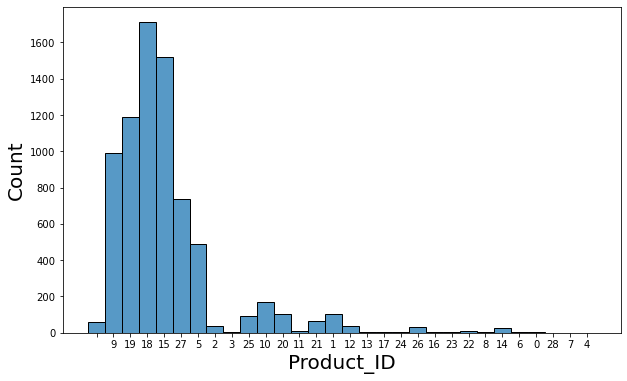

In [38]:
plt.figure(figsize=(10,6),facecolor='white')
sns.histplot(data['Product_ID'])
plt.xlabel('Product_ID',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

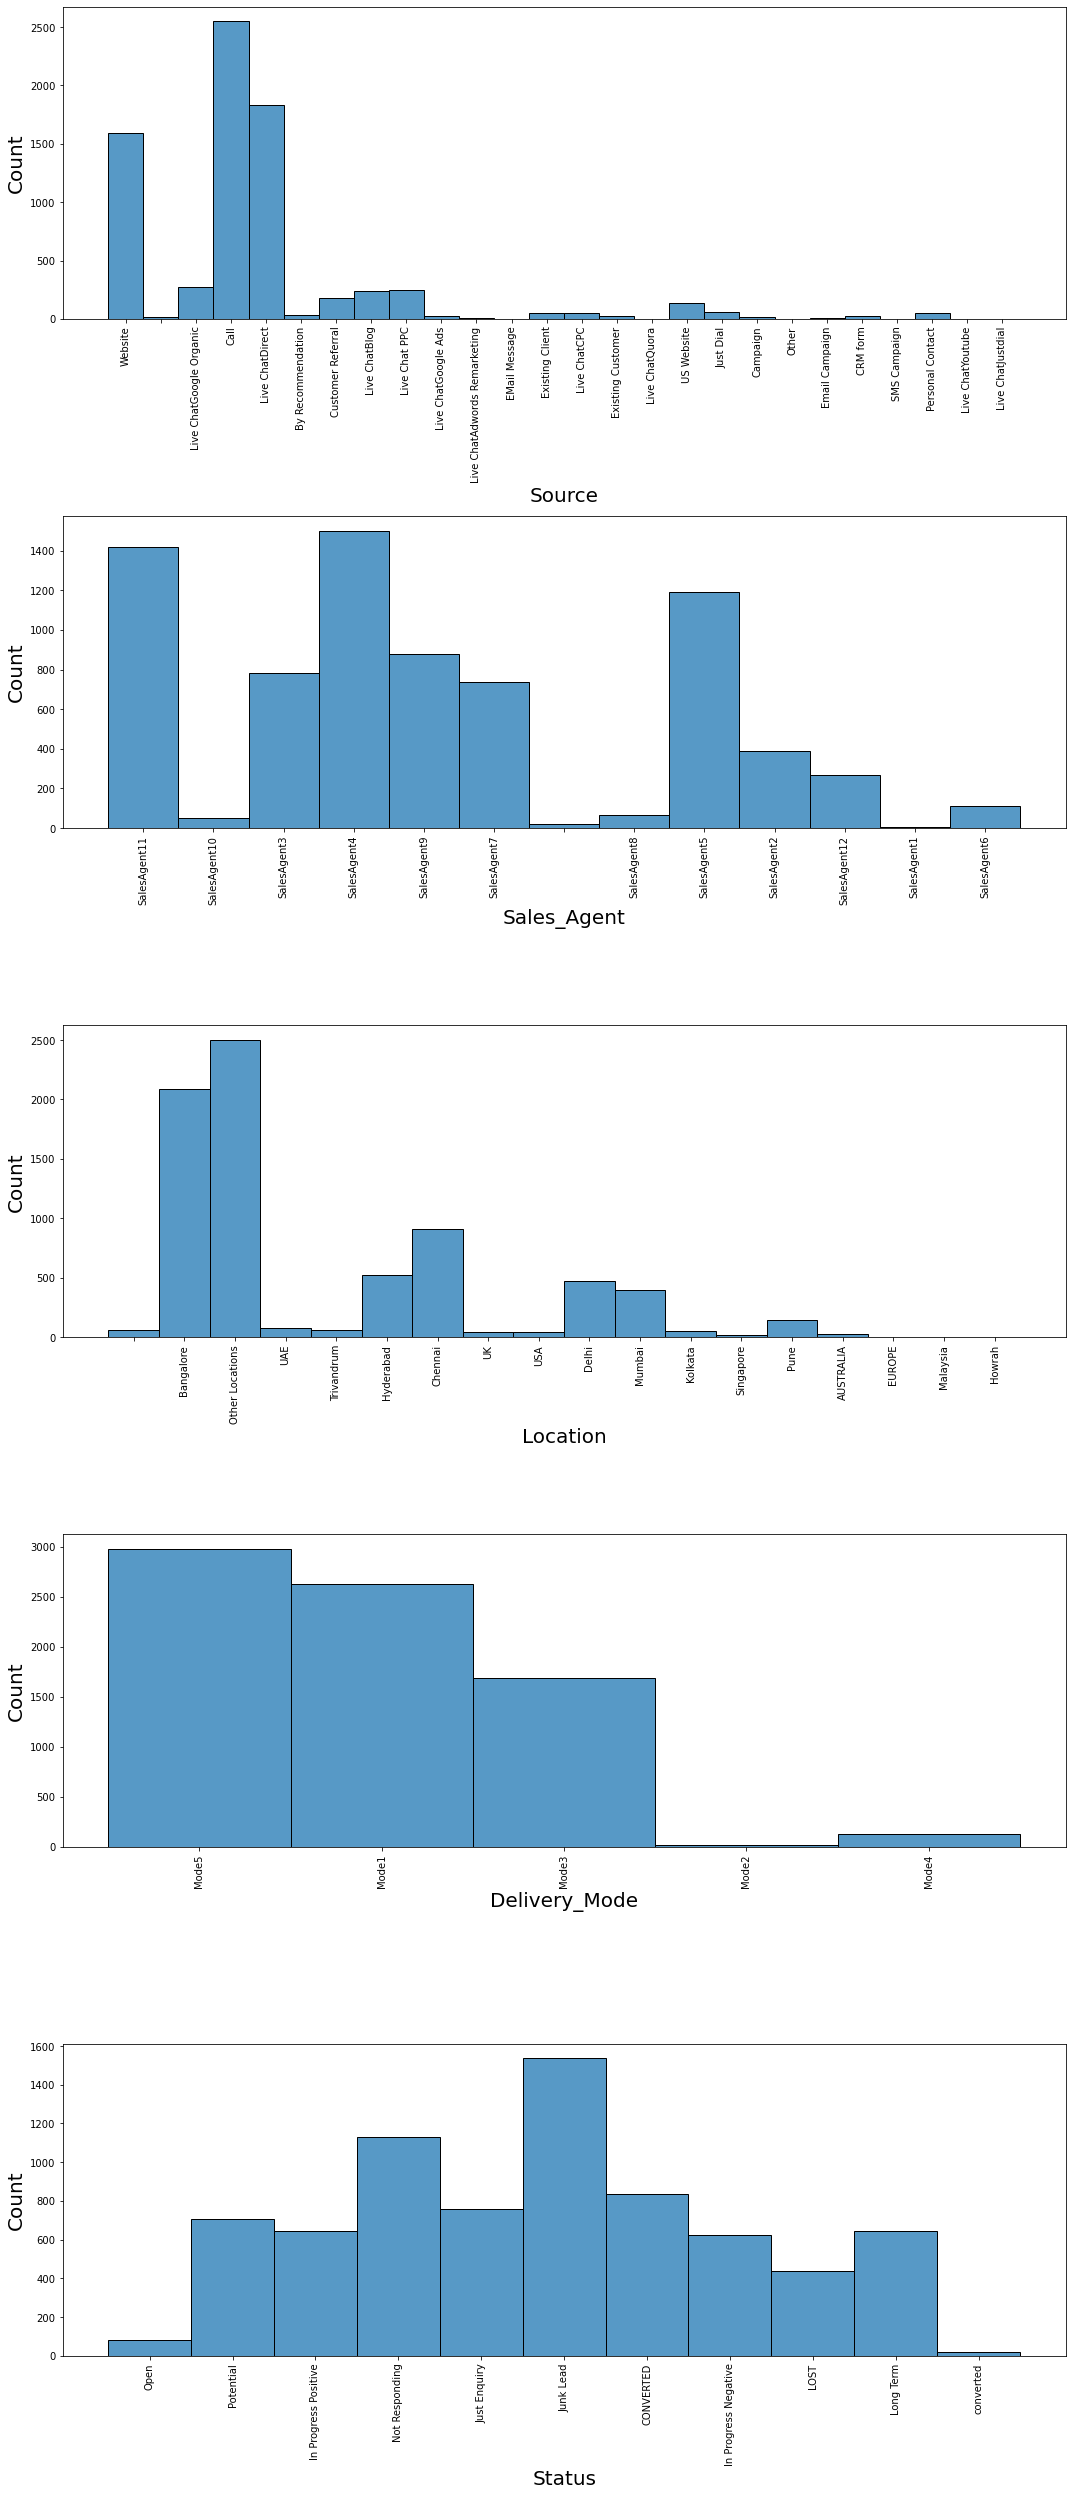

In [39]:
plt.figure(figsize=(15,40),facecolor='white')
plotnumber=1

for column in data1:
    if plotnumber<=6:
        ax=plt.subplot(6,1,plotnumber)
        sns.histplot(data[column],palette='Set2')
        plt.xticks(rotation=90)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [40]:
## Bivariate analysis

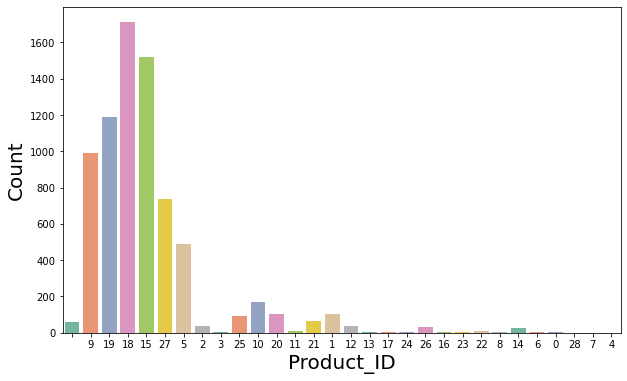

In [41]:
plt.figure(figsize=(10,6),facecolor='white')
sns.countplot(data['Product_ID'],palette='Set2')
plt.xlabel('Product_ID',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

### Insight: Product ID 18, 15, 19, 27, 9 and 5  has more sold product in comparison to others.

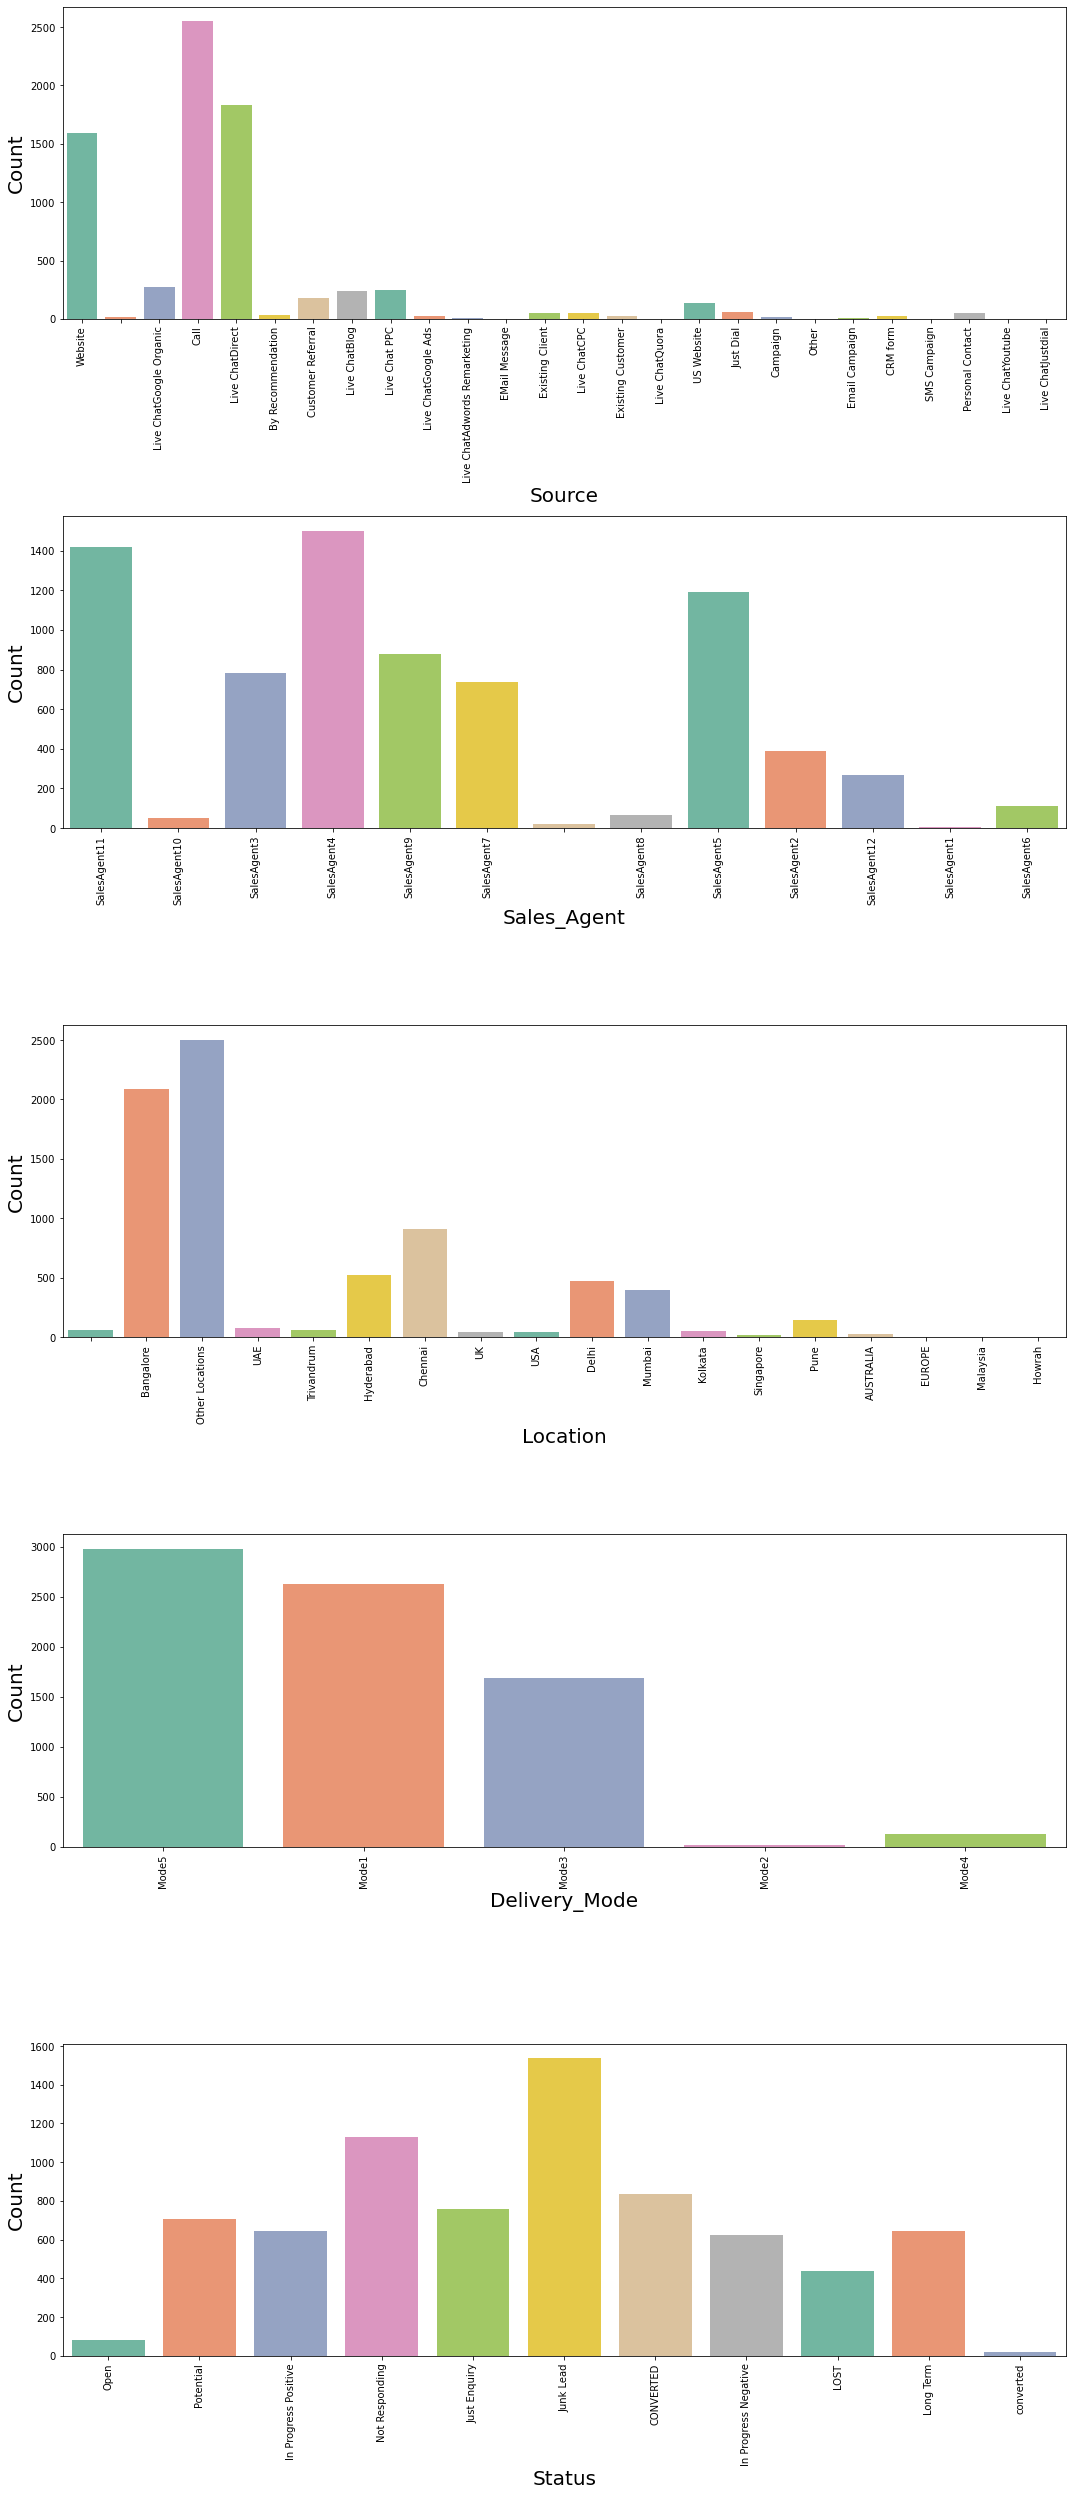

In [42]:
plt.figure(figsize=(15,40),facecolor='white')
plotnumber=1

for column in data1:
    if plotnumber<=6:
        ax=plt.subplot(6,1,plotnumber)
        sns.countplot(data[column],palette='Set2')
        plt.xticks(rotation=90)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Insights:

#### 1.Source:

* Most of the sales has call, live chat direct and website source.
     
* Remaining all the other sources are less than 250.

#### 2.Sales_Agent:

* Most of the sales are done by sales agent 4, sales agent 11 and sales agent 5.

* Sales agent 3,9,7 has below than 850 sale.

* Remaining all other sales agent has done less sale.

#### 3.Location:

* Banglore and other location has more sales.

* Chennai, Hyderabad, Delhi and Mumbai city has sales less than that of Bangalore and other location.

* Remaining other cities has extremly less sale.

#### 4.Delivery Mode:

* Delivery Mode 5 has maximum count.

* Mode 1 & Mode 3 has less count than mode 5.

* Mode 2 & 4 has minimum count for delivery.

#### 5.Status:

* The junk lead means low potential customer or client has high count in comparison to others..

* Low potential customers are more and high potential customers are less.

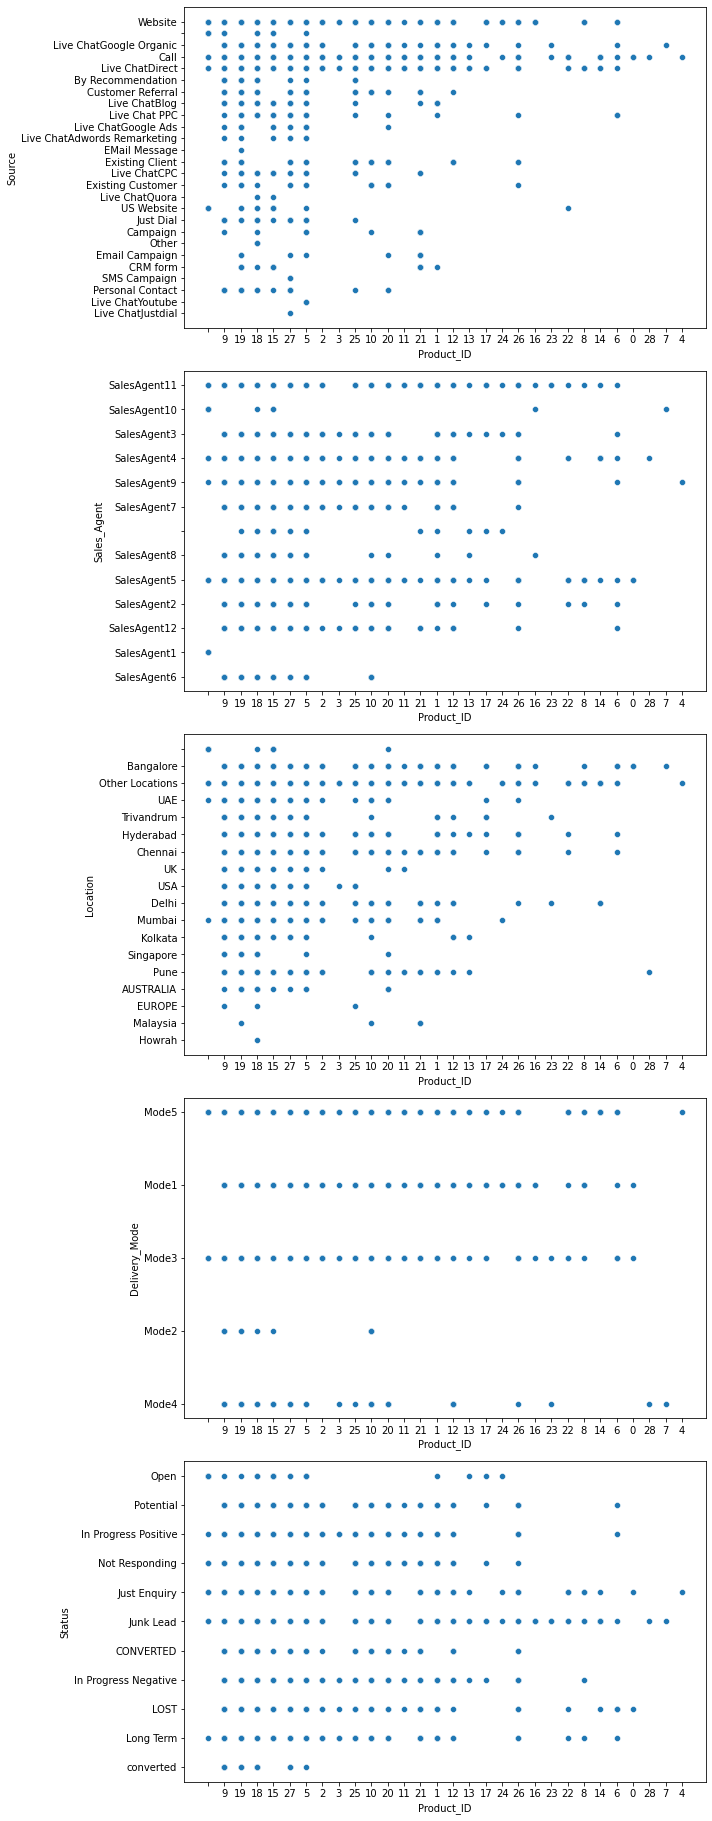

In [43]:
plt.figure(figsize=(10,30),facecolor='white')
plotnumber=1

for column in data1:
    if plotnumber<=6:
        ax=plt.subplot(6,1,plotnumber)
        sns.scatterplot(x=data['Product_ID'],y=data1[column],data=data1)
        plt.xlabel('Product_ID',fontsize=10)
        plt.ylabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [44]:
data2=data[['Product_ID','Sales_Agent','Location','Delivery_Mode','Status']]
data2.head(1)

,Product_ID,Sales_Agent,Location,Delivery_Mode,Status
0,,SalesAgent11,,Mode5,Open


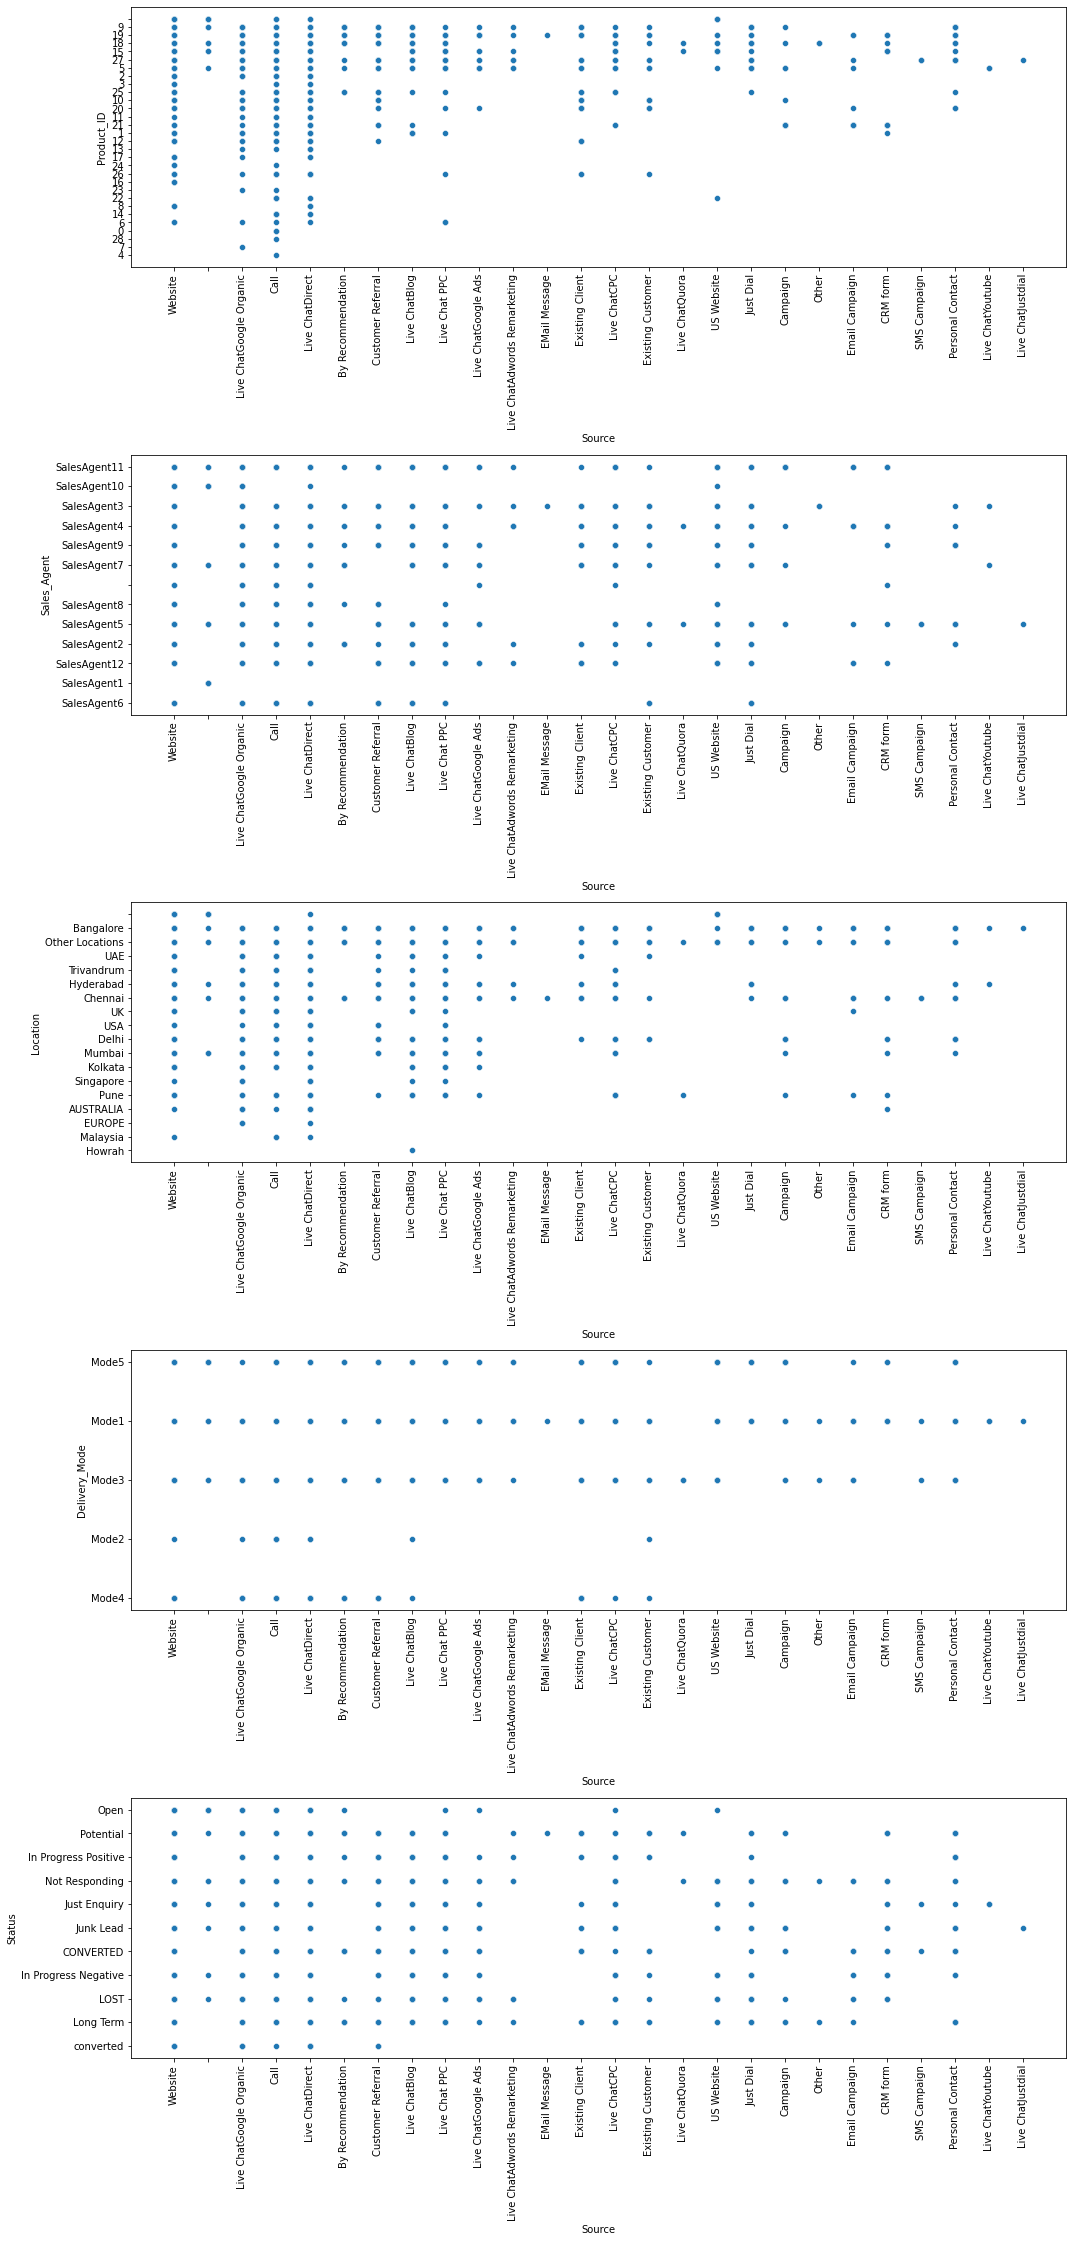

In [45]:
plt.figure(figsize=(15,35),facecolor='white')
plotnumber=1

for column in data2:
    if plotnumber<=6:
        ax=plt.subplot(6,1,plotnumber)
        sns.scatterplot(x=data['Source'],y=data2[column],data=data2)
        plt.xticks(rotation=90)
        plt.xlabel('Source',fontsize=10)
        plt.ylabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [46]:
data3=data[['Product_ID','Source','Location','Delivery_Mode','Status']]
data3.head(1)

,Product_ID,Source,Location,Delivery_Mode,Status
0,,Website,,Mode5,Open


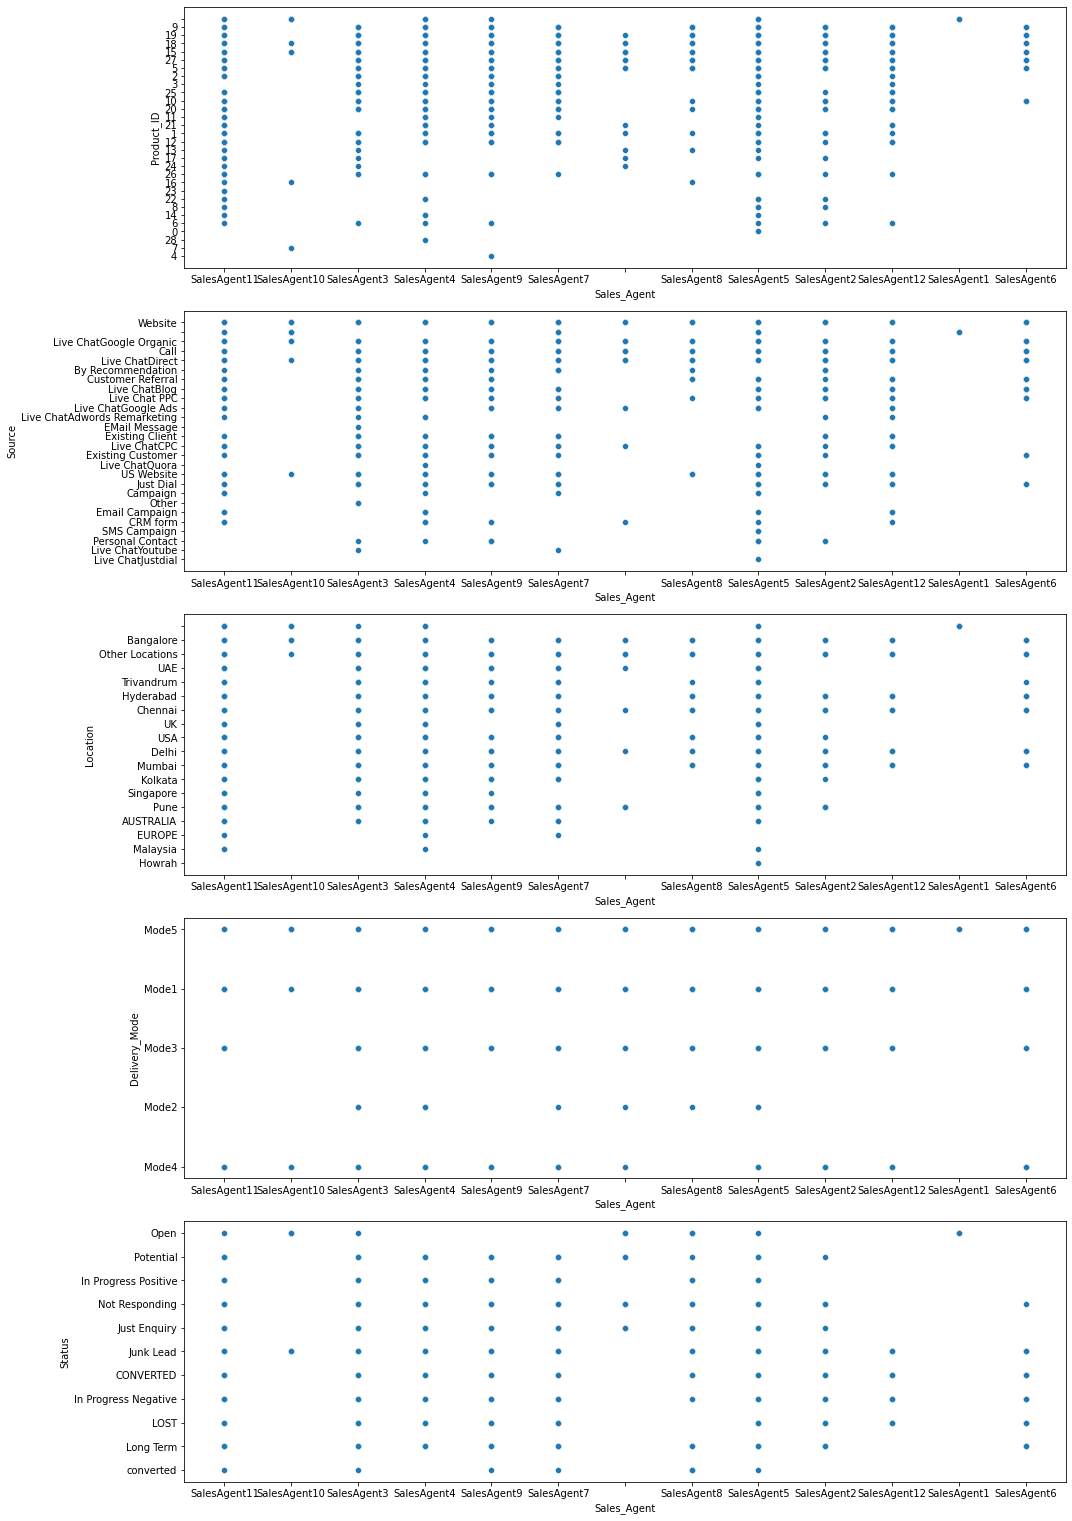

In [47]:
plt.figure(figsize=(15,25),facecolor='white')
plotnumber=1

for column in data3:
    if plotnumber<=6:
        ax=plt.subplot(6,1,plotnumber)
        sns.scatterplot(x=data['Sales_Agent'],y=data3[column],data=data3)
        plt.xlabel('Sales_Agent',fontsize=10)
        plt.ylabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [48]:
data4=data[['Product_ID','Source','Sales_Agent','Delivery_Mode','Status']]
data4.head(1)

,Product_ID,Source,Sales_Agent,Delivery_Mode,Status
0,,Website,SalesAgent11,Mode5,Open


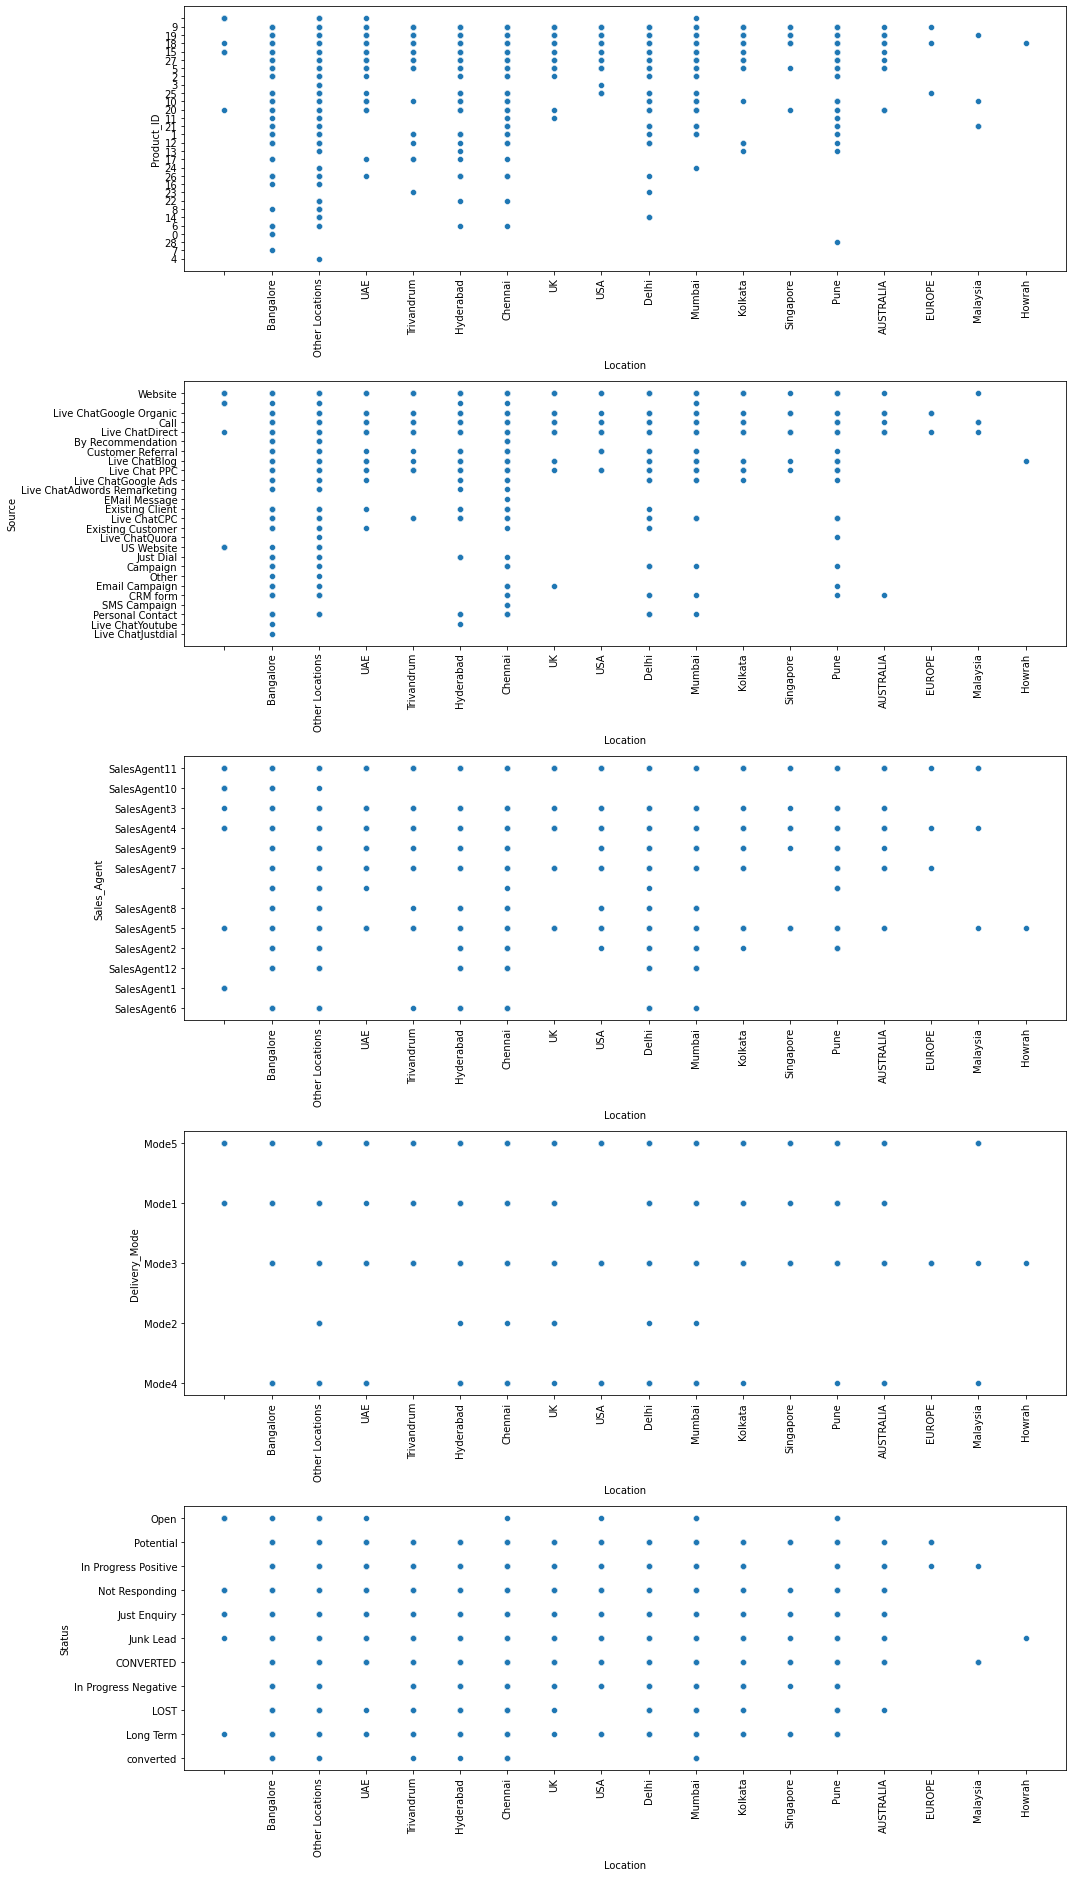

In [49]:
plt.figure(figsize=(15,30),facecolor='white')
plotnumber=1

for column in data4:
    if plotnumber<=6:
        ax=plt.subplot(6,1,plotnumber)
        sns.scatterplot(x=data['Location'],y=data4[column],data=data4)
        plt.xticks(rotation=90)
        plt.xlabel('Location',fontsize=10)
        plt.ylabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [50]:
data5=data[['Product_ID','Source','Sales_Agent','Location','Status']]
data5.head(1)

,Product_ID,Source,Sales_Agent,Location,Status
0,,Website,SalesAgent11,,Open


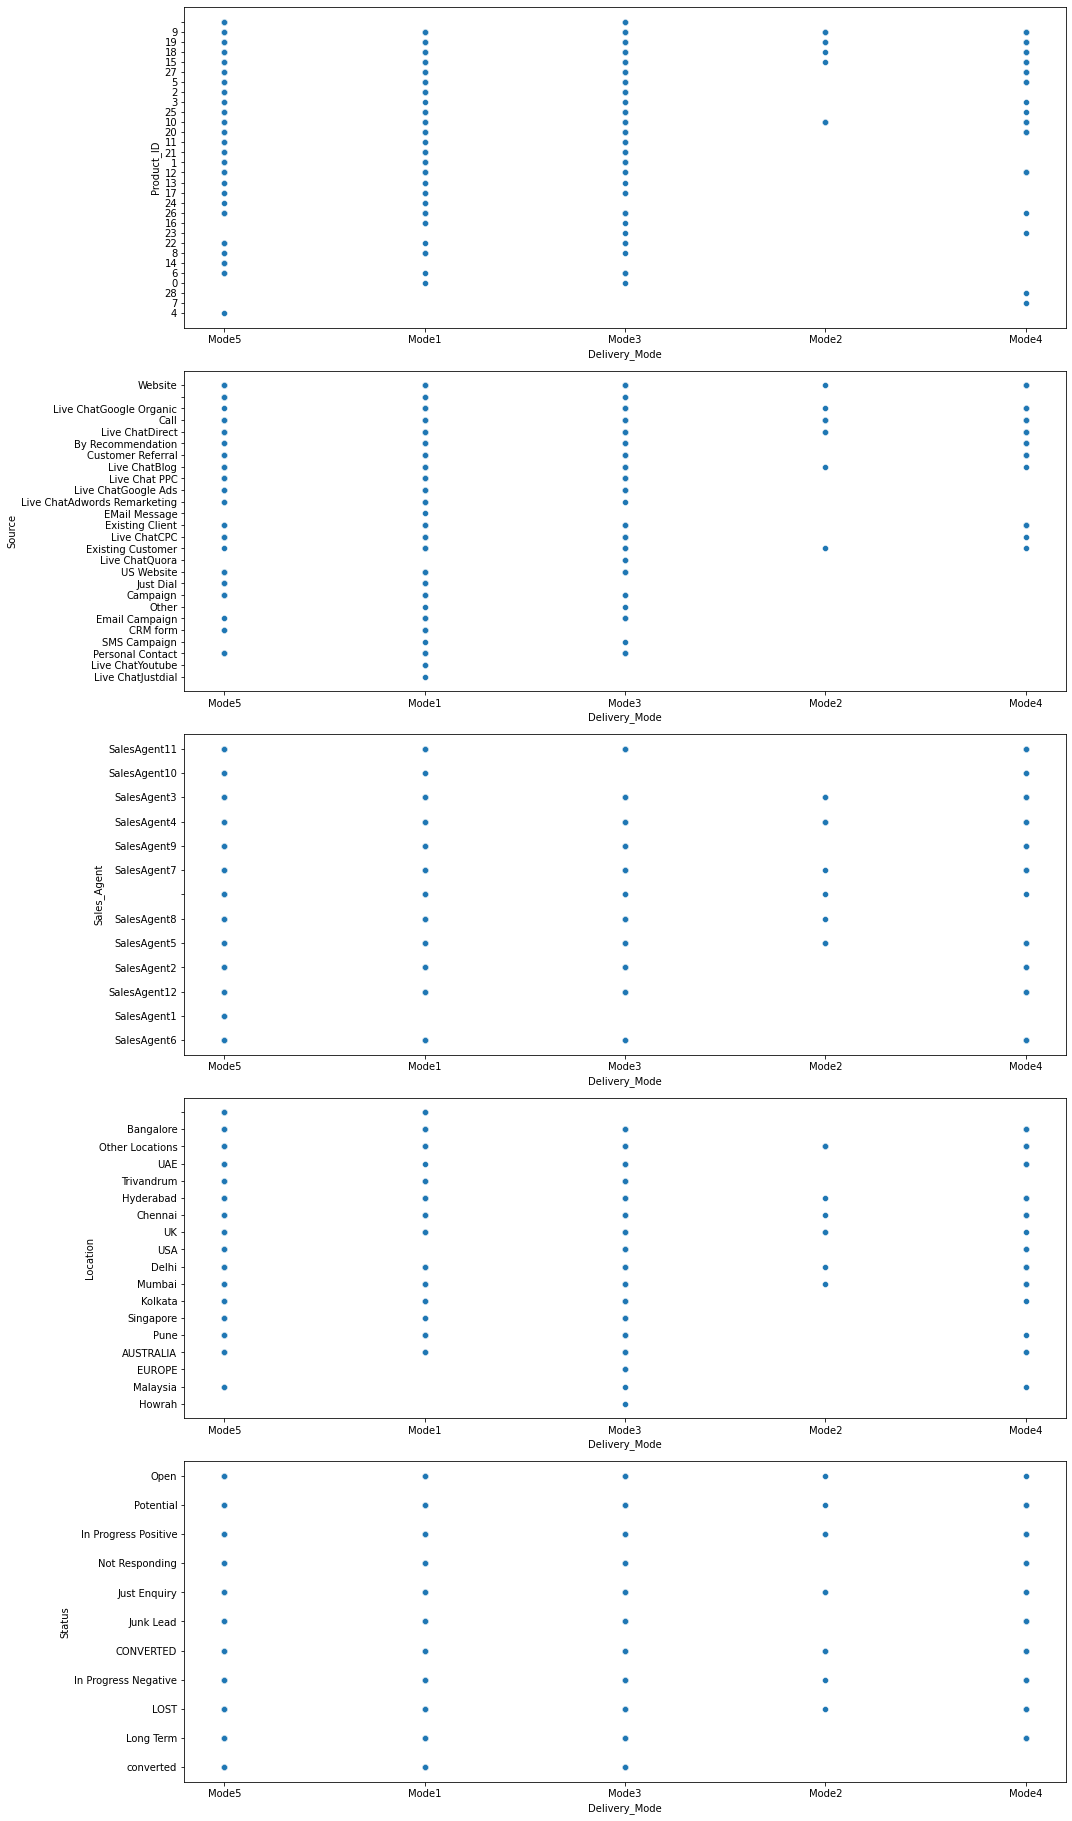

In [51]:
plt.figure(figsize=(15,30),facecolor='white')
plotnumber=1

for column in data5:
    if plotnumber<=6:
        ax=plt.subplot(6,1,plotnumber)
        sns.scatterplot(x=data['Delivery_Mode'],y=data5[column],data=data5)
        plt.xlabel('Delivery_Mode',fontsize=10)
        plt.ylabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [52]:
data6=data[['Product_ID','Source','Sales_Agent','Location','Delivery_Mode']]
data6.head(1)

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode
0,,Website,SalesAgent11,,Mode5


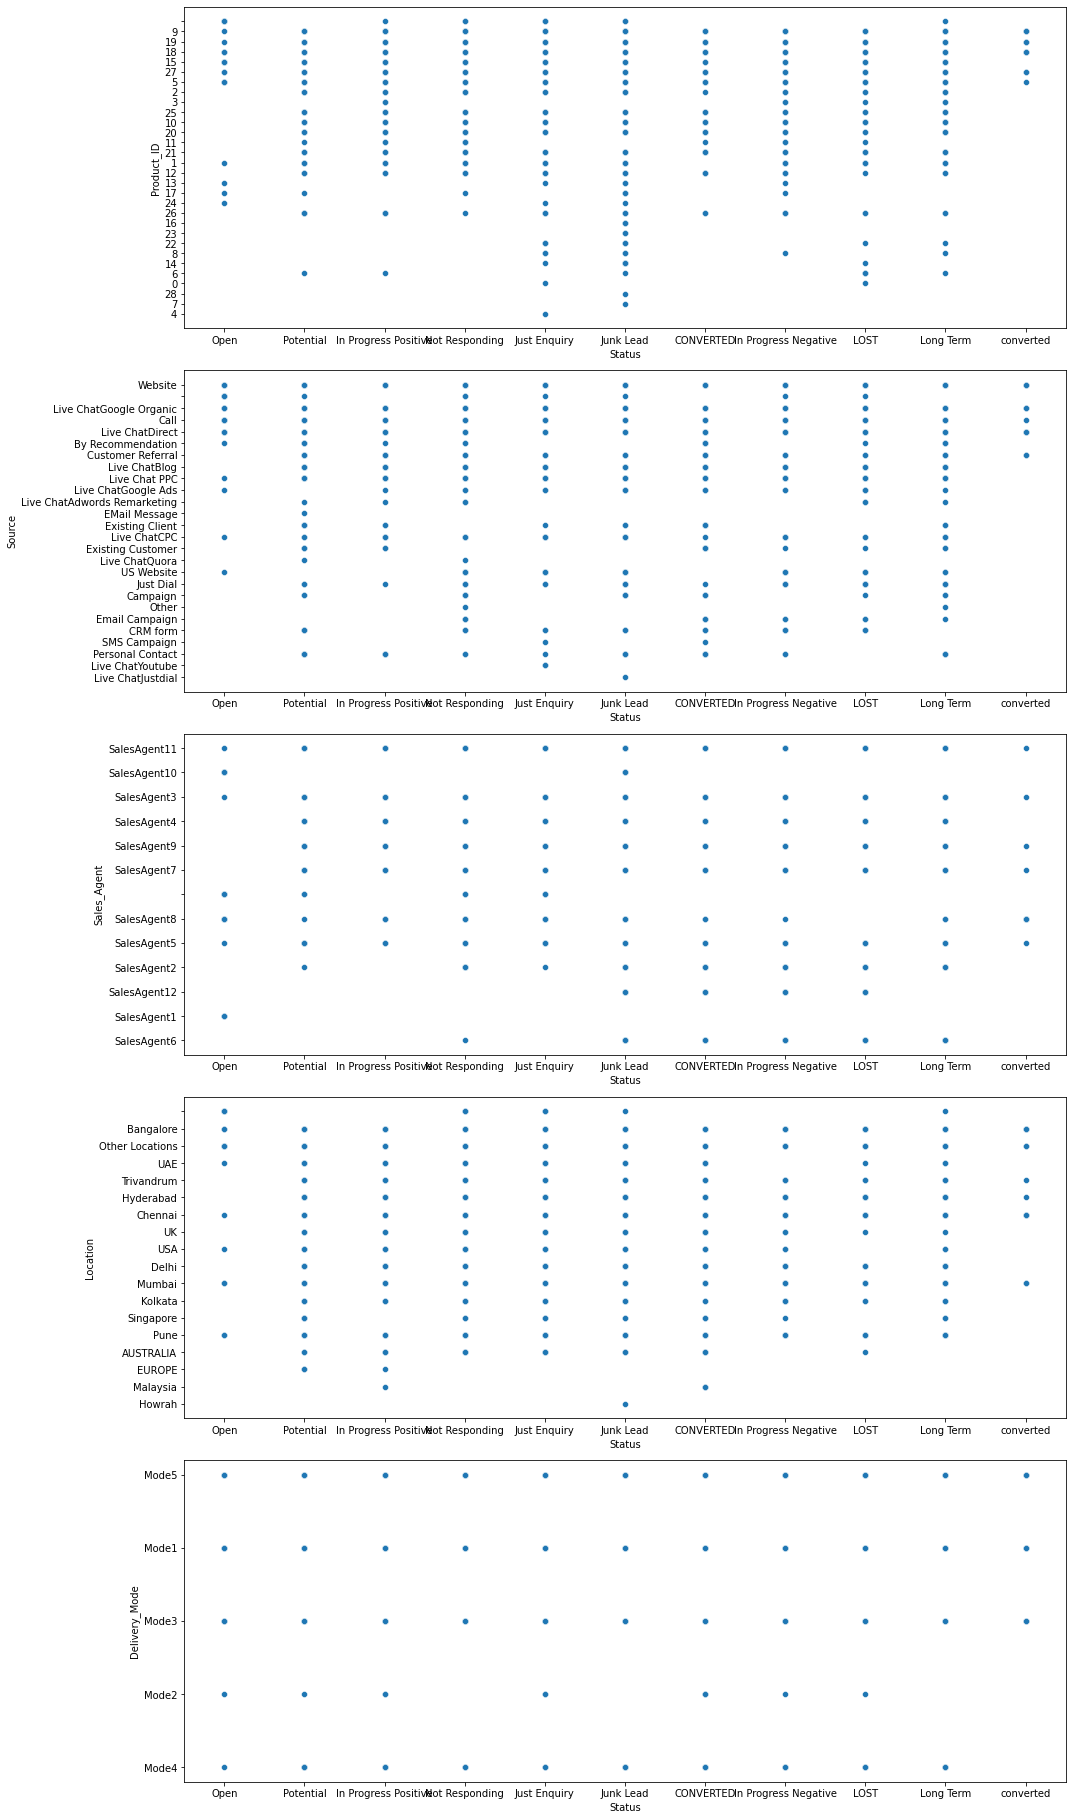

In [53]:
plt.figure(figsize=(15,30),facecolor='white')
plotnumber=1

for column in data6:
    if plotnumber<=6:
        ax=plt.subplot(6,1,plotnumber)
        sns.scatterplot(x=data['Status'],y=data6[column],data=data6)
        plt.xlabel('Status',fontsize=10)
        plt.ylabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

### Data Preprocessing and Feature Engineering

In [54]:
#Step1: Handling the missing values
data.isnull().sum()

Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

In [55]:
# Replacing blank spaces with nan 
data.replace('',np.nan,inplace=True)
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14112018 1005,NaN,Website,984XXXXXXX,aXXXXXXXgmailcom,SalesAgent11,NaN,Mode5,Open
1,14112018 0922,NaN,Website,XXXXXXX,VALUE!,SalesAgent10,NaN,Mode5,Open
2,14112018 0921,NaN,Website,XXXXXXX,dXXXXXXXyahoocom,SalesAgent10,NaN,Mode5,Open
3,14112018 0846,NaN,Website,XXXXXXX,wXXXXXXXgmailcom,SalesAgent10,NaN,Mode5,Open
4,14112018 0734,NaN,Website,XXXXXXX,cXXXXXXXgmailcom,SalesAgent10,NaN,Mode5,Open


In [56]:
## Replacing the nan values with Mode

In [57]:
data.Product_ID.mode()

0    18
dtype: object

In [58]:
data['Product_ID'].replace(np.nan,'18',inplace=True)
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14112018 1005,18,Website,984XXXXXXX,aXXXXXXXgmailcom,SalesAgent11,NaN,Mode5,Open
1,14112018 0922,18,Website,XXXXXXX,VALUE!,SalesAgent10,NaN,Mode5,Open
2,14112018 0921,18,Website,XXXXXXX,dXXXXXXXyahoocom,SalesAgent10,NaN,Mode5,Open
3,14112018 0846,18,Website,XXXXXXX,wXXXXXXXgmailcom,SalesAgent10,NaN,Mode5,Open
4,14112018 0734,18,Website,XXXXXXX,cXXXXXXXgmailcom,SalesAgent10,NaN,Mode5,Open


In [59]:
data.Source.mode()

0    Call
dtype: object

In [60]:
data['Source'].replace(np.nan,'Call',inplace=True)
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14112018 1005,18,Website,984XXXXXXX,aXXXXXXXgmailcom,SalesAgent11,NaN,Mode5,Open
1,14112018 0922,18,Website,XXXXXXX,VALUE!,SalesAgent10,NaN,Mode5,Open
2,14112018 0921,18,Website,XXXXXXX,dXXXXXXXyahoocom,SalesAgent10,NaN,Mode5,Open
3,14112018 0846,18,Website,XXXXXXX,wXXXXXXXgmailcom,SalesAgent10,NaN,Mode5,Open
4,14112018 0734,18,Website,XXXXXXX,cXXXXXXXgmailcom,SalesAgent10,NaN,Mode5,Open


In [61]:
data.Sales_Agent.mode()

0    SalesAgent4
dtype: object

In [62]:
data['Sales_Agent'].replace(np.nan,'SalesAgent4',inplace=True)
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14112018 1005,18,Website,984XXXXXXX,aXXXXXXXgmailcom,SalesAgent11,NaN,Mode5,Open
1,14112018 0922,18,Website,XXXXXXX,VALUE!,SalesAgent10,NaN,Mode5,Open
2,14112018 0921,18,Website,XXXXXXX,dXXXXXXXyahoocom,SalesAgent10,NaN,Mode5,Open
3,14112018 0846,18,Website,XXXXXXX,wXXXXXXXgmailcom,SalesAgent10,NaN,Mode5,Open
4,14112018 0734,18,Website,XXXXXXX,cXXXXXXXgmailcom,SalesAgent10,NaN,Mode5,Open


In [63]:
data.Location.mode()

0    Other Locations
dtype: object

In [64]:
data['Location'].replace(np.nan,'Other Locations',inplace=True)
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14112018 1005,18,Website,984XXXXXXX,aXXXXXXXgmailcom,SalesAgent11,Other Locations,Mode5,Open
1,14112018 0922,18,Website,XXXXXXX,VALUE!,SalesAgent10,Other Locations,Mode5,Open
2,14112018 0921,18,Website,XXXXXXX,dXXXXXXXyahoocom,SalesAgent10,Other Locations,Mode5,Open
3,14112018 0846,18,Website,XXXXXXX,wXXXXXXXgmailcom,SalesAgent10,Other Locations,Mode5,Open
4,14112018 0734,18,Website,XXXXXXX,cXXXXXXXgmailcom,SalesAgent10,Other Locations,Mode5,Open


In [65]:
## Checking missing values after handling the nan

In [66]:
data.isnull().sum()

Created             0
Product_ID          0
Source              0
Mobile           1810
EMAIL               0
Sales_Agent         0
Location            0
Delivery_Mode       0
Status              0
dtype: int64

In [67]:
## Merging the labels.

In [68]:
# Labelling of Product_ID having minimum sold product.
data.Product_ID.replace(['11','22','3','17','6','8','13','24','16','23','0','28','7','4'],'minimum sold',inplace=True)

In [69]:
# Labelling of Source based on similarity in the labels.
data.Source.replace(['Live ChatDirect','Live ChatGoogle Organic','Live Chat PPC','Live ChatBlog','Live ChatCPC',
                    'Live ChatGoogle Ads','Live ChatAdwords Remarketing','Live ChatQuora','Live ChatYoutube',
                    'Live ChatJustdial'],'live chat',inplace=True)

data.Source.replace(['Existing Client','Personal Contact','CRM form','Existing Customer'],'new client',inplace=True)

data.Source.replace(['US Website','Just Dial'],'social',inplace=True)

data.Source.replace(['Customer Referral','By Recommendation'],'recommendation',inplace=True)

data.Source.replace(['Campaign','Email Campaign','SMS Campaign','EMail Message'],'campaign',inplace=True)

In [70]:
data.Source.value_counts()

live chat         2677
Call              2564
Website           1594
recommendation     212
social             193
new client         146
campaign            34
Other                2
Name: Source, dtype: int64

In [71]:
# Merging the Location into different labels.

data.Location.replace(['Trivandrum','Kolkata','Howrah'],'Other Locations',inplace=True)

data.Location.replace(['UAE','Malaysia','Singapore'],'asia',inplace=True)

data.Location.replace(['USA','UK','AUSTRALIA','EUROPE'],'west country',inplace=True)

In [72]:
data.Location.value_counts()

Other Locations    2672
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
west country        114
asia                100
Name: Location, dtype: int64

In [73]:
# Ceation of two labels in Status category.

data.Status.replace(['Junk Lead','Not Responding','In Progress Negative','Just Enquiry','LOST'],'low potential',inplace=True)

data.Status.replace(['CONVERTED','Potential','Long Term','In Progress Positive','Open','converted'],'high potential',inplace=True)

In [74]:
data.Status.value_counts()

low potential     4491
high potential    2931
Name: Status, dtype: int64

In [75]:
## Numerical representation of string data
### Product_ID
data.loc[data['Product_ID']=='minimum sold','Product_ID']=0

In [79]:
##Frequency coding

In [80]:
data.Source.value_counts()

live chat         2677
Call              2564
Website           1594
recommendation     212
social             193
new client         146
campaign            34
Other                2
Name: Source, dtype: int64

In [81]:
### Source

data.loc[data['Source']=='live chat','Source']=7
data.loc[data['Source']=='Call','Source']=6
data.loc[data['Source']=='Website','Source']=5
data.loc[data['Source']=='recommendation','Source']=4
data.loc[data['Source']=='social','Source']=3
data.loc[data['Source']=='new client','Source']=2
data.loc[data['Source']=='campaign','Source']=1
data.loc[data['Source']=='Other','Source']=0

In [82]:
data.Source.value_counts()

7    2677
6    2564
5    1594
4     212
3     193
2     146
1      34
0       2
Name: Source, dtype: int64

In [83]:
data.Sales_Agent.value_counts()

SalesAgent4     1523
SalesAgent11    1420
SalesAgent5     1190
SalesAgent9      879
SalesAgent3      781
SalesAgent7      736
SalesAgent2      389
SalesAgent12     269
SalesAgent6      114
SalesAgent8       68
SalesAgent10      49
SalesAgent1        4
Name: Sales_Agent, dtype: int64

In [84]:
### Sales_Agent

data.loc[data['Sales_Agent']=='SalesAgent4','Sales_Agent']=11
data.loc[data['Sales_Agent']=='SalesAgent11','Sales_Agent']=10
data.loc[data['Sales_Agent']=='SalesAgent5','Sales_Agent']=9
data.loc[data['Sales_Agent']=='SalesAgent9','Sales_Agent']=8
data.loc[data['Sales_Agent']=='SalesAgent3','Sales_Agent']=7
data.loc[data['Sales_Agent']=='SalesAgent7','Sales_Agent']=6
data.loc[data['Sales_Agent']=='SalesAgent2','Sales_Agent']=5
data.loc[data['Sales_Agent']=='SalesAgent12','Sales_Agent']=4
data.loc[data['Sales_Agent']=='SalesAgent6','Sales_Agent']=3
data.loc[data['Sales_Agent']=='SalesAgent8','Sales_Agent']=2
data.loc[data['Sales_Agent']=='SalesAgent10','Sales_Agent']=1
data.loc[data['Sales_Agent']=='SalesAgent1','Sales_Agent']=0

In [85]:
data.Sales_Agent.value_counts()

11    1523
10    1420
9     1190
8      879
7      781
6      736
5      389
4      269
3      114
2       68
1       49
0        4
Name: Sales_Agent, dtype: int64

In [86]:
data.Location.value_counts()

Other Locations    2672
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
west country        114
asia                100
Name: Location, dtype: int64

In [87]:
### Location

data.loc[data['Location']=='Other Locations','Location']=8
data.loc[data['Location']=='Bangalore','Location']=7
data.loc[data['Location']=='Chennai','Location']=6
data.loc[data['Location']=='Hyderabad','Location']=5
data.loc[data['Location']=='Delhi','Location']=4
data.loc[data['Location']=='Mumbai','Location']=3
data.loc[data['Location']=='Pune','Location']=2
data.loc[data['Location']=='west country','Location']=1
data.loc[data['Location']=='asia','Location']=0

In [88]:
data.Location.value_counts()

8    2672
7    2084
6     909
5     528
4     471
3     402
2     142
1     114
0     100
Name: Location, dtype: int64

In [89]:
data.Delivery_Mode.value_counts()

Mode5    2975
Mode1    2627
Mode3    1688
Mode4     121
Mode2      11
Name: Delivery_Mode, dtype: int64

In [90]:
## Delivery_Mode

data.loc[data['Delivery_Mode'] == 'Mode5','Delivery_Mode']=4
data.loc[data['Delivery_Mode'] == 'Mode1','Delivery_Mode']=3
data.loc[data['Delivery_Mode'] == 'Mode3','Delivery_Mode']=2
data.loc[data['Delivery_Mode'] == 'Mode4','Delivery_Mode']=1
data.loc[data['Delivery_Mode'] == 'Mode2','Delivery_Mode']=0

In [91]:
data.Delivery_Mode.value_counts()

4    2975
3    2627
2    1688
1     121
0      11
Name: Delivery_Mode, dtype: int64

In [92]:
data.Status.value_counts()

low potential     4491
high potential    2931
Name: Status, dtype: int64

In [93]:
### Status

data.loc[data['Status']=='low potential','Status']=1
data.loc[data['Status']=='high potential','Status']=0

In [94]:
data.Status.value_counts()

1    4491
0    2931
Name: Status, dtype: int64

In [95]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14112018 1005,18,5,984XXXXXXX,aXXXXXXXgmailcom,10,8,4,0
1,14112018 0922,18,5,XXXXXXX,VALUE!,1,8,4,0
2,14112018 0921,18,5,XXXXXXX,dXXXXXXXyahoocom,1,8,4,0
3,14112018 0846,18,5,XXXXXXX,wXXXXXXXgmailcom,1,8,4,0
4,14112018 0734,18,5,XXXXXXX,cXXXXXXXgmailcom,1,8,4,0


### Feature selection

In [96]:
## Dropping unique and constant columns
data.drop(['Created','Mobile','EMAIL'],axis=1,inplace=True)

In [97]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,18,5,10,8,4,0
1,18,5,1,8,4,0
2,18,5,1,8,4,0
3,18,5,1,8,4,0
4,18,5,1,8,4,0


In [98]:
## Changing the datatype
data.Product_ID=data['Product_ID'].astype('int64')
data.Source=data['Source'].astype('int64')
data.Location=data['Location'].astype('int64')
data.Sales_Agent=data['Sales_Agent'].astype('int64')
data.Delivery_Mode=data['Delivery_Mode'].astype('int64')
data.Status=data['Status'].astype('int64')

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Product_ID     7422 non-null   int64
 1   Source         7422 non-null   int64
 2   Sales_Agent    7422 non-null   int64
 3   Location       7422 non-null   int64
 4   Delivery_Mode  7422 non-null   int64
 5   Status         7422 non-null   int64
dtypes: int64(6)
memory usage: 348.0 KB


<AxesSubplot:>

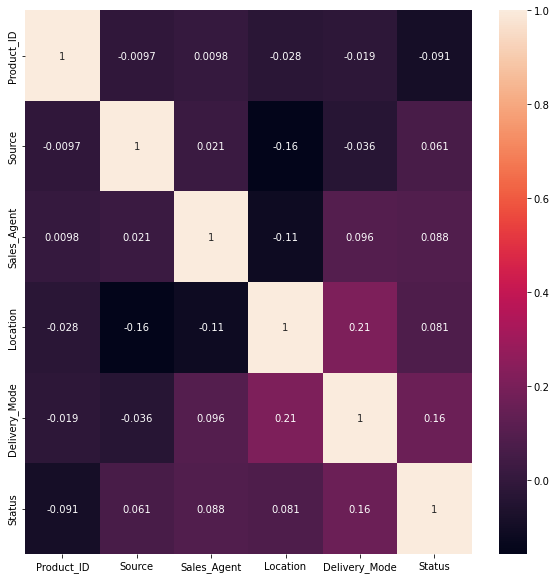

In [100]:
## Checking correlation
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)

### Model creation

In [101]:
## Creating independent and dependent variable
X = data.drop('Status', axis=1)
Y = data.Status

In [102]:
## Balancing the data
from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE()
print(Counter(Y))
X_sm,Y_sm=sm.fit_resample(X,Y)
print(Counter(Y_sm))

Counter({1: 4491, 0: 2931})
Counter({0: 4491, 1: 4491})


In [103]:
## preparing training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_sm, Y_sm, test_size=0.25, random_state=42)

In [104]:
X_train

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode
469,2,7,7,7,3
4162,15,6,9,8,4
3418,10,7,9,3,4
3153,18,7,7,7,3
3455,19,4,11,7,3
...,...,...,...,...,...
5734,15,6,10,8,4
5191,14,6,11,8,4
5390,27,7,11,6,2
860,18,6,7,6,3


In [105]:
Y_train

469     1
4162    1
3418    1
3153    1
3455    0
       ..
5734    1
5191    1
5390    1
860     1
7270    1
Name: Status, Length: 6736, dtype: int64

In [106]:
X_test

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode
7588,9,6,11,6,3
93,9,6,8,7,4
761,19,6,8,7,4
8824,19,6,7,7,2
8458,19,5,10,8,4
...,...,...,...,...,...
2676,9,4,7,7,3
1820,19,6,8,3,4
51,15,6,10,8,4
4782,5,6,11,8,4


In [107]:
Y_test

7588    0
93      0
761     0
8824    0
8458    0
       ..
2676    0
1820    0
51      0
4782    1
4395    1
Name: Status, Length: 2246, dtype: int64

In [108]:
X_train.shape

(6736, 5)

In [109]:
Y_train.shape

(6736,)

In [110]:
X_test.shape

(2246, 5)

In [112]:
Y_test.shape

(2246,)

In [113]:
## Step3: Model creation

### Logistic Regression

In [114]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train,Y_train)

LogisticRegression()

In [115]:
##Step4: Prediction
y_pred_lr=clf.predict(X_test)
y_pred_lr

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [123]:
train_pred_lr=clf.predict(X_train)
train_pred_lr

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

#### Model evaluation for Logistic Regression

In [124]:
from sklearn.metrics import accuracy_score,confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [125]:
cm_lr=confusion_matrix(Y_test,y_pred_lr)
print(cm_lr)

[[665 462]
 [438 681]]


In [126]:
recall_lr=recall_score(Y_test,y_pred_lr)
recall_lr

0.6085790884718498

In [127]:
precision_lr=precision_score(Y_test,y_pred_lr)
precision_lr

0.5958005249343832

In [128]:
f1score_lr=f1_score(Y_test,y_pred_lr)
f1score_lr

0.6021220159151193

In [129]:
acc_lr=accuracy_score(Y_test,y_pred_lr)
acc_lr

0.5992876224398932

In [130]:
cr_lr=classification_report(Y_test,y_pred_lr)
print(cr_lr)

              precision    recall  f1-score   support

           0       0.60      0.59      0.60      1127
           1       0.60      0.61      0.60      1119

    accuracy                           0.60      2246
   macro avg       0.60      0.60      0.60      2246
weighted avg       0.60      0.60      0.60      2246



In [132]:
acc_train_lr=accuracy_score(Y_train,train_pred_lr)
acc_train_lr

0.5979809976247031

In [273]:
cr_train_lr=classification_report(Y_train,train_pred_lr)
print(cr_train_lr)

              precision    recall  f1-score   support

           0       0.60      0.60      0.60      3364
           1       0.60      0.60      0.60      3372

    accuracy                           0.60      6736
   macro avg       0.60      0.60      0.60      6736
weighted avg       0.60      0.60      0.60      6736



In [274]:
print("Training Accuracy Score:",acc_train_lr*100)

Training Accuracy Score: 59.798099762470315


In [275]:
print("Testing Accuracy Score:",acc_lr*100)

Testing Accuracy Score: 59.92876224398932


* Logistic Regression is not performing well on both testing and training data.

### Decision Tree

In [134]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
y_hat_dt=dt.predict(X_test)
y_hat_dt

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [137]:
train_predict_dt=dt.predict(X_train)
train_predict_dt

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

#### Model Evaluation

In [138]:
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix,precision_score,recall_score

In [140]:
cm_dt=confusion_matrix(Y_test,y_hat_dt)
print(cm_dt)

[[882 245]
 [373 746]]


In [141]:
recall_dt=recall_score(Y_test,y_hat_dt)
recall_dt

0.6666666666666666

In [142]:
precision_dt=precision_score(Y_test,y_hat_dt)
precision_dt

0.7527749747729566

In [143]:
f1score_dt=f1_score(Y_test,y_hat_dt)
f1score_dt

0.7071090047393366

In [144]:
acc_dt=accuracy_score(Y_test,y_hat_dt)
acc_dt

0.7248441674087266

In [146]:
cr_dt=classification_report(Y_test,y_hat_dt)
print(cr_dt)

              precision    recall  f1-score   support

           0       0.70      0.78      0.74      1127
           1       0.75      0.67      0.71      1119

    accuracy                           0.72      2246
   macro avg       0.73      0.72      0.72      2246
weighted avg       0.73      0.72      0.72      2246



In [276]:
acc_dt1=accuracy_score(Y_train,train_predict_dt)
acc_dt1

0.8442695961995249

In [277]:
cr_train_dt=classification_report(Y_train,train_predict_dt)
print(cr_train_dt)

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      3364
           1       0.89      0.79      0.84      3372

    accuracy                           0.84      6736
   macro avg       0.85      0.84      0.84      6736
weighted avg       0.85      0.84      0.84      6736



In [278]:
print("Testing Accuracy Score:",acc_dt*100)

Testing Accuracy Score: 72.48441674087266


In [279]:
print("Training Accuracy Score:",acc_dt1*100)

Training Accuracy Score: 84.42695961995248


* Decision Tree seems to be working good on Training data but not on Testing data.

#### Hyperparameter tuning

In [280]:
# Importing library
from sklearn.model_selection import GridSearchCV

# Tuning the parameter
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 30))), 
    "min_samples_split":[2, 3, 4,5], 
    "min_samples_leaf":list(range(1, 10)), 
}


tree_clf = DecisionTreeClassifier(random_state=3)
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=2, cv=3)

# Fitting traning data
tree_cv.fit(X_train,Y_train)

# Get the best parameter
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params}")

Fitting 3 folds for each of 4176 candidates, totalling 12528 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


In [281]:
# Placing the parameter on decision tree classifier
dt1=DecisionTreeClassifier(criterion='entropy',
                           max_depth=18,min_samples_leaf=1,
                           min_samples_split=2,splitter='random')

In [282]:
# Fitting training data
dt1.fit(X_train,Y_train)

# Prediction on testing data
y_hat_DT = dt1.predict(X_test)
y_hat_DT

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [283]:
train_pred_DT=dt1.predict(X_train)
train_pred_DT

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

#### Model Evaluation after Hyperparameter Tuning

In [284]:
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix,precision_score,recall_score

In [285]:
recall_DT=recall_score(Y_test,y_hat_DT)
recall_DT

0.6532618409294012

In [286]:
precision_DT=precision_score(Y_test,y_hat_DT)
precision_DT

0.7505133470225873

In [287]:
f1score_DT=f1_score(Y_test,y_hat_DT)
f1score_DT

0.6985188724319158

In [288]:
acc_DT=accuracy_score(Y_test,y_hat_DT)
acc_DT

0.7190560997328584

In [160]:
cm_DT=confusion_matrix(Y_test,y_hat_DT)
print(cm_DT)

[[874 253]
 [377 742]]


In [161]:
cr_DT=classification_report(Y_test,y_hat_DT)
print(cr_DT)

              precision    recall  f1-score   support

           0       0.70      0.78      0.74      1127
           1       0.75      0.66      0.70      1119

    accuracy                           0.72      2246
   macro avg       0.72      0.72      0.72      2246
weighted avg       0.72      0.72      0.72      2246



In [289]:
acc_DT1=accuracy_score(Y_train,train_pred_DT)
acc_DT1

0.8432304038004751

In [290]:
cr_train_DT=classification_report(Y_train,train_pred_DT)
print(cr_train_DT)

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      3364
           1       0.89      0.79      0.83      3372

    accuracy                           0.84      6736
   macro avg       0.85      0.84      0.84      6736
weighted avg       0.85      0.84      0.84      6736



In [291]:
print(" Testing Accuracy Score after hyperparameter tuning:",acc_DT*100)

 Testing Accuracy Score after hyperparameter tuning: 71.90560997328585


In [293]:
print(" Training Accuracy Score after hyperparameter tuning:",acc_DT1*100)

 Training Accuracy Score after hyperparameter tuning: 84.32304038004752


* Not much improvement is observed after hyperparamater tuning.

### Random Forest Classifier

In [294]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train,Y_train)

RandomForestClassifier()

In [295]:
y_pred_rf=rf_clf.predict(X_test)
y_pred_rf

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [296]:
train_predict_rf=rf_clf.predict(X_train)
train_predict_rf

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

#### Model evaluation

In [297]:
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix,precision_score,recall_score

In [298]:
cm_rf=confusion_matrix(Y_test,y_pred_rf)
print(cm_rf)

[[863 264]
 [326 793]]


In [299]:
recall_rf=recall_score(Y_test,y_pred_rf)
recall_rf

0.7086684539767649

In [300]:
precision_rf=precision_score(Y_test,y_pred_rf)
precision_rf

0.750236518448439

In [301]:
f1score_rf=f1_score(Y_test,y_pred_rf)
f1score_rf

0.7288602941176471

In [302]:
acc_rf=accuracy_score(Y_test,y_pred_rf)
acc_rf

0.7373107747105966

In [303]:
cr_rf=classification_report(Y_test,y_pred_rf)
print(cr_rf)

              precision    recall  f1-score   support

           0       0.73      0.77      0.75      1127
           1       0.75      0.71      0.73      1119

    accuracy                           0.74      2246
   macro avg       0.74      0.74      0.74      2246
weighted avg       0.74      0.74      0.74      2246



In [304]:
acc_rf1=accuracy_score(Y_train,train_predict_rf)
acc_rf1

0.8442695961995249

In [305]:
cr_rf1=classification_report(Y_train,train_predict_rf)
print(cr_rf1)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      3364
           1       0.86      0.82      0.84      3372

    accuracy                           0.84      6736
   macro avg       0.85      0.84      0.84      6736
weighted avg       0.85      0.84      0.84      6736



In [306]:
print("Testing Accuracy Score:",acc_rf*100)

Testing Accuracy Score: 73.73107747105966


In [307]:
print("Training Accuracy Score:",acc_rf1*100)

Training Accuracy Score: 84.42695961995248


* Random Forest Classifier is performing much well on training data than testing data.

#### Hyperparameter Tuning

In [308]:
# Imutation of parameter
from sklearn.model_selection import RandomizedSearchCV
# not used grid search cv beacuse memory reason

n_estimators = [int(x) for x in np.linspace(start=100, stop=2000, num=10)]
max_features = ['auto', 'sqrt'] ### auto - select randomly, sqrt - 
max_depth = [int(x) for x in np.linspace(10, 110, num=10)] ### level in the tree
max_depth.append(None)
min_samples_split = [2, 5, 15]
min_samples_leaf = [1, 2, 4]


# Dictionary of parameter
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Object creation
rf_clf1 = RandomForestClassifier(random_state=42) 
# provide random state beacuse select row and column randomly


# Randomized search cv with parameter
rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=3, random_state=42, n_jobs=-1)


# Fitting the training data
rf_cv.fit(X_train, Y_train)

# Getting the best parameter
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 1577, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 21})


In [309]:
rf_clf2 = RandomForestClassifier(**rf_best_params)

# Fitting the training data
rf_clf2.fit(X_train,Y_train)

# Prediction on test data
y_pred_RF = rf_clf2.predict(X_test)
y_pred_RF

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [310]:
train_predict_RF=rf_clf2.predict(X_train)
train_predict_RF

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

#### Model Evaluation after hyperparameter tuning

In [311]:
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix,precision_score,recall_score

In [312]:
recall_RF=recall_score(Y_test,y_pred_RF)
recall_RF

0.7238605898123325

In [313]:
precision_RF=precision_score(Y_test,y_pred_RF)
precision_RF

0.7444852941176471

In [314]:
f1score_RF=f1_score(Y_test,y_pred_RF)
f1score_RF

0.7340280924331671

In [315]:
acc_RF=accuracy_score(Y_test,y_pred_RF)
acc_RF

0.738646482635797

In [316]:
cm_RF=confusion_matrix(Y_test,y_pred_RF)
print(cm_RF)

[[849 278]
 [309 810]]


In [317]:
cr_RF=classification_report(Y_test,y_pred_RF)
print(cr_RF)

              precision    recall  f1-score   support

           0       0.73      0.75      0.74      1127
           1       0.74      0.72      0.73      1119

    accuracy                           0.74      2246
   macro avg       0.74      0.74      0.74      2246
weighted avg       0.74      0.74      0.74      2246



In [318]:
acc_RF1=accuracy_score(Y_train,train_predict_RF)
acc_RF1

0.8234857482185273

In [319]:
cr_RF1=classification_report(Y_train,train_predict_RF)
print(cr_RF1)

              precision    recall  f1-score   support

           0       0.81      0.84      0.83      3364
           1       0.84      0.81      0.82      3372

    accuracy                           0.82      6736
   macro avg       0.82      0.82      0.82      6736
weighted avg       0.82      0.82      0.82      6736



In [320]:
print(" Testing Accuracy Score after hyperparameter tuning:",acc_RF*100)

 Testing Accuracy Score after hyperparameter tuning: 73.8646482635797


In [321]:
print(" Training Accuracy Score after hyperparameter tuning:",acc_RF1*100)

 Training Accuracy Score after hyperparameter tuning: 82.34857482185272


* Hyperparameter tuning has worked good on testing data.

### K Neighbours Classifier

In [322]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = [] # Creating empty list
for i in range(2,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    y_hat_knn = knn.predict(X_test)
    error_rate.append(np.mean(y_hat_knn != Y_test))
print("Error rate:",error_rate)

Error rate: [0.2983081032947462, 0.28138913624220835, 0.27960819234194123, 0.27070347284060553, 0.27337488869100623, 0.26892252894033836, 0.27649154051647373, 0.28138913624220835, 0.27203918076580585]


In [323]:
y_hat_knn

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [324]:
train_predict_knn=knn.predict(X_train)
train_predict_knn

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

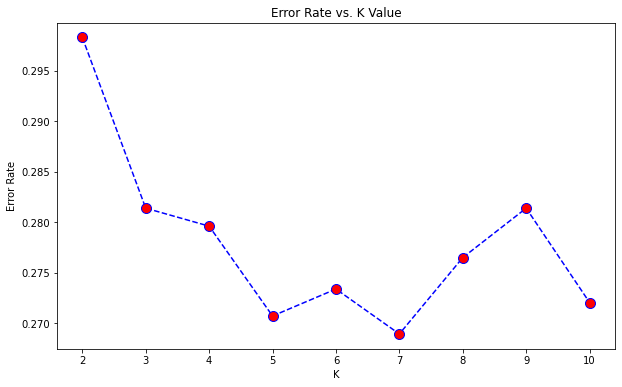

In [325]:
### Plotting error rate
plt.figure(figsize=(10,6))
plt.plot(range(2,11),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

#### Model Evaluation

In [326]:
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix,precision_score,recall_score

In [327]:
cm_knn=confusion_matrix(Y_test,y_hat_knn)
print(cm_knn)

[[925 202]
 [409 710]]


In [328]:
recall_knn=recall_score(Y_test,y_hat_knn)
recall_knn

0.6344950848972297

In [329]:
precision_knn=precision_score(Y_test,y_hat_knn)
precision_knn

0.7785087719298246

In [330]:
acc_knn=accuracy_score(Y_test,y_hat_knn)
acc_knn

0.7279608192341941

In [331]:
f1score_knn=f1_score(Y_test,y_hat_knn)
f1score_knn

0.6991629739044806

In [332]:
cr_knn=classification_report(Y_test,y_hat_knn)
print(cr_knn)

              precision    recall  f1-score   support

           0       0.69      0.82      0.75      1127
           1       0.78      0.63      0.70      1119

    accuracy                           0.73      2246
   macro avg       0.74      0.73      0.73      2246
weighted avg       0.74      0.73      0.73      2246



In [333]:
acc_knn1=accuracy_score(Y_train,train_predict_knn)
acc_knn1

0.7597980997624703

In [334]:
cr_knn1=classification_report(Y_train,train_predict_knn)
print(cr_knn1)

              precision    recall  f1-score   support

           0       0.72      0.85      0.78      3364
           1       0.82      0.67      0.74      3372

    accuracy                           0.76      6736
   macro avg       0.77      0.76      0.76      6736
weighted avg       0.77      0.76      0.76      6736



In [335]:
print("Testing Accuracy Score:",acc_knn*100)

Testing Accuracy Score: 72.79608192341941


In [336]:
print("Training Accuracy Score:",acc_knn1*100)

Training Accuracy Score: 75.97980997624703


* K Neighbour classifier seems to be somewhat working good on training data in comparison to testing data

### Bagging on K Neighbours Classifier

In [337]:
from sklearn.ensemble import BaggingClassifier#import bagging
KNN1=KNeighborsClassifier() # Model not seen any training data
model_bagg1=BaggingClassifier(base_estimator=KNN1,n_estimators=45) ## model objet creation
#base_estimator---> algorithm which you want to pass
#n_estimotors-----> number of base learners
model_bagg1.fit(X_train,Y_train) ## fitting the model
y_hat_bagg=model_bagg1.predict(X_test) ## getting the prediction

In [338]:
y_hat_bagg

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [339]:
train_predict_bagg=model_bagg1.predict(X_train)
train_predict_bagg

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

#### Model Evaluation

In [340]:
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix,precision_score,recall_score

In [341]:
recall_bagg=recall_score(Y_test,y_hat_bagg)
recall_bagg

0.6961572832886506

In [342]:
precision_bagg=precision_score(Y_test,y_hat_bagg)
precision_bagg

0.7548449612403101

In [343]:
acc_bagg=accuracy_score(Y_test,y_hat_bagg)
acc_bagg

0.7359750667853963

In [344]:
f1score_bagg=f1_score(Y_test,y_hat_bagg)
f1score_bagg

0.7243142724314273

In [345]:
cm_bagg=confusion_matrix(Y_test,y_hat_bagg)
print(cm_bagg)

[[874 253]
 [340 779]]


In [346]:
cr_bagg=classification_report(Y_test,y_hat_bagg)
print(cr_bagg)

              precision    recall  f1-score   support

           0       0.72      0.78      0.75      1127
           1       0.75      0.70      0.72      1119

    accuracy                           0.74      2246
   macro avg       0.74      0.74      0.74      2246
weighted avg       0.74      0.74      0.74      2246



In [347]:
acc_bagg1=accuracy_score(Y_train,train_predict_bagg)
acc_bagg1

0.8021080760095012

In [348]:
cr_bagg1=classification_report(Y_train,train_predict_bagg)
print(cr_bagg1)

              precision    recall  f1-score   support

           0       0.78      0.83      0.81      3364
           1       0.82      0.77      0.80      3372

    accuracy                           0.80      6736
   macro avg       0.80      0.80      0.80      6736
weighted avg       0.80      0.80      0.80      6736



In [349]:
print("Testing Score after bagging:",acc_bagg*100)

Testing Score after bagging: 73.59750667853963


In [350]:
print("Training Score after bagging:",acc_bagg1*100)

Training Score after bagging: 80.21080760095012


* After bagging, improvement could be seen in both training and testing data.

### Gradient Boosting Classifier

In [351]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(learning_rate=0.1,n_estimators=150,random_state=42)
gbc.fit(X_train,Y_train)
gbc_pred=gbc.predict(X_test)
gbc_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [352]:
train_predict_gbc=gbc.predict(X_train)
train_predict_gbc

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

#### Model Evaluation

In [353]:
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix,precision_score,recall_score

In [354]:
recall_gbc=recall_score(Y_test,gbc_pred)
recall_gbc

0.6970509383378016

In [355]:
precision_gbc=precision_score(Y_test,gbc_pred)
precision_gbc

0.7372400756143668

In [356]:
acc_gbc=accuracy_score(Y_test,gbc_pred)
acc_gbc

0.7252894033837934

In [357]:
f1score_gbc=recall_score(Y_test,gbc_pred)
f1score_gbc

0.6970509383378016

In [358]:
cm_gbc=confusion_matrix(Y_test,gbc_pred)
print(cm_gbc)

[[849 278]
 [339 780]]


In [359]:
cr_gbc=classification_report(Y_test,gbc_pred)
print(cr_gbc)

              precision    recall  f1-score   support

           0       0.71      0.75      0.73      1127
           1       0.74      0.70      0.72      1119

    accuracy                           0.73      2246
   macro avg       0.73      0.73      0.73      2246
weighted avg       0.73      0.73      0.73      2246



In [360]:
acc_gbc1=accuracy_score(Y_train,train_predict_gbc)
acc_gbc1

0.7381235154394299

In [361]:
cr_gbc1=classification_report(Y_train,train_predict_gbc)
print(cr_gbc1)

              precision    recall  f1-score   support

           0       0.72      0.77      0.75      3364
           1       0.75      0.71      0.73      3372

    accuracy                           0.74      6736
   macro avg       0.74      0.74      0.74      6736
weighted avg       0.74      0.74      0.74      6736



In [362]:
print("Testing Accuracy Score:",acc_gbc*100)

Testing Accuracy Score: 72.52894033837934


In [363]:
print("Training Accuracy Score:",acc_gbc1*100)

Training Accuracy Score: 73.812351543943


* Gradient boosting is working equally good on both testing and training data.

### XGB Classifier

In [364]:
import xgboost

In [365]:
from xgboost import XGBClassifier#importing the model library
xgb_r=XGBClassifier() ## object creation
xgb_r.fit(X_train,Y_train)# fitting the data
y_hat_xgb=xgb_r.predict(X_test)

In [366]:
y_hat_xgb

array([0, 0, 0, ..., 1, 1, 1])

In [367]:
train_predict_xgb=xgb_r.predict(X_train)
train_predict_xgb

array([1, 1, 1, ..., 0, 0, 1])

#### Model Evaluation

In [368]:
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix,precision_score,recall_score

In [369]:
recall_xgb=recall_score(Y_test,y_hat_xgb)
recall_xgb

0.7033065236818588

In [370]:
precision_xgb=precision_score(Y_test,y_hat_xgb)
precision_xgb

0.7355140186915888

In [371]:
f1score_xgb=f1_score(Y_test,y_hat_xgb)
f1score_xgb

0.7190497944266788

In [372]:
acc_xgb=accuracy_score(Y_test,y_hat_xgb)
acc_xgb

0.726179875333927

In [373]:
cm_xgb=confusion_matrix(Y_test,y_hat_xgb)
print(cm_xgb)

[[844 283]
 [332 787]]


In [374]:
cr_xgb=classification_report(Y_test,y_hat_xgb)
print(cr_xgb)

              precision    recall  f1-score   support

           0       0.72      0.75      0.73      1127
           1       0.74      0.70      0.72      1119

    accuracy                           0.73      2246
   macro avg       0.73      0.73      0.73      2246
weighted avg       0.73      0.73      0.73      2246



In [375]:
acc_xgb1=accuracy_score(Y_train,train_predict_xgb)
acc_xgb1

0.7961698337292161

In [376]:
cr_xgb1=classification_report(Y_train,train_predict_xgb)
print(cr_xgb1)

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      3364
           1       0.81      0.77      0.79      3372

    accuracy                           0.80      6736
   macro avg       0.80      0.80      0.80      6736
weighted avg       0.80      0.80      0.80      6736



In [377]:
print("Testing Accuracy Score:",acc_xgb*100)

Testing Accuracy Score: 72.61798753339271


In [378]:
print("Training Accuracy Score:",acc_xgb1*100)

Training Accuracy Score: 79.61698337292161


* XGB Classifier doesn't seem to be performing well on testing data.

### Hyperparameter Tuning

In [379]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.001,0.01,0.1, 0.03, 0.06, 0.1, 0.15, 0.02,0.003, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [3,5,6,7,8,10],
              'n_estimators': [50,65,80,100,130,150],
              'reg_alpha': [0,0.01,0.1,0.02,0.2,0.4,0.8,1.6,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.01,0.1,0.02,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

# Object creation with parameter
XGB = XGBClassifier(random_state=42)

# Create randomized search cv with parameter
rcv = RandomizedSearchCV(estimator=XGB,scoring='f1',param_distributions=param_grid,n_iter=150,
                        cv=5,verbose=3,random_state=5,n_jobs=-1)

#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

# Fitting training data on randomized search cv
rcv.fit(X_train,Y_train)

# Get best parameters
rcv_best_parameter = rcv.best_params_
print(f"Best parameter: {rcv_best_parameter}")

Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best parameter: {'reg_lambda': 6.4, 'reg_alpha': 0.4, 'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.5, 'gamma': 0}


In [380]:
XGB1 = XGBClassifier(reg_lambda=6.4,reg_alpha=0.4,n_estimators=50,max_depth=5,learning_rate=0.5,gamma=0)

# Fitting the training data
XGB1.fit(X_train,Y_train)

# Prediction on testing data
XGB_pred = XGB1.predict(X_test)
XGB_pred

array([0, 0, 0, ..., 1, 1, 1])

In [381]:
train_predict_XGB=XGB1.predict(X_train)
train_predict_XGB

array([1, 1, 1, ..., 0, 0, 1])

#### Model Evaluation after Hyperparameter Tuning

In [382]:
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix,precision_score,recall_score

In [383]:
recall_XGB=recall_score(Y_test,XGB_pred)
recall_XGB

0.7140303842716711

In [384]:
precision_XGB=precision_score(Y_test,XGB_pred)
precision_XGB

0.7384473197781886

In [385]:
f1score_XGB=f1_score(Y_test,XGB_pred)
f1score_XGB

0.7260336210813266

In [386]:
acc_XGB = accuracy_score(XGB_pred,Y_test)
print("Accuracy score after hyperparameter tunning",acc_XGB*100)

Accuracy score after hyperparameter tunning 73.15227070347284


In [387]:
cm_XGB=confusion_matrix(Y_test,XGB_pred)
print(cm_XGB)

[[844 283]
 [320 799]]


In [388]:
cr_XGB=classification_report(Y_test,XGB_pred)
print(cr_XGB)

              precision    recall  f1-score   support

           0       0.73      0.75      0.74      1127
           1       0.74      0.71      0.73      1119

    accuracy                           0.73      2246
   macro avg       0.73      0.73      0.73      2246
weighted avg       0.73      0.73      0.73      2246



In [389]:
acc_XGB1 = accuracy_score(train_predict_XGB,Y_train)
acc_XGB1

0.7692992874109263

In [390]:
cr_XGB1=classification_report(Y_train,train_predict_XGB)
print(cr_XGB1)

              precision    recall  f1-score   support

           0       0.75      0.80      0.78      3364
           1       0.79      0.74      0.76      3372

    accuracy                           0.77      6736
   macro avg       0.77      0.77      0.77      6736
weighted avg       0.77      0.77      0.77      6736



In [391]:
print(" Testing Accuracy Score after hyperparamater tuning:",acc_XGB*100)

 Testing Accuracy Score after hyperparamater tuning: 73.15227070347284


In [392]:
print(" Training Accuracy Score after hyperparamater tuning:",acc_XGB1*100)

 Training Accuracy Score after hyperparamater tuning: 76.92992874109264


* After hyperparameter tuning, testing score seems to be slightely improved.

### Comparison Table

* From the above models, it can be seen that Gradient Boosting is working equally well on both Testing and Training data.